# Plotting shots

In [1]:
!pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [2]:
import pandas as pd
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
parser = Sbopen()
df_competition = parser.competition()

In [4]:
df_competition['competition_name'].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [5]:
df_matches = parser.match(competition_id=43,season_id=106)
df_matches[df_matches['competition_stage_name']=='Final']['match_id']

9    3869685
Name: match_id, dtype: int64

In [6]:
df, related, freeze, tactics = parser.event(3869685)
#get team names
team1, team2 = df.team_name.unique()
#getting a dataframe of shots
shots = df[df['type_name']=='Shot'].set_index('id')

In [7]:
print(team1,' vs ',team2)

Argentina  vs  France


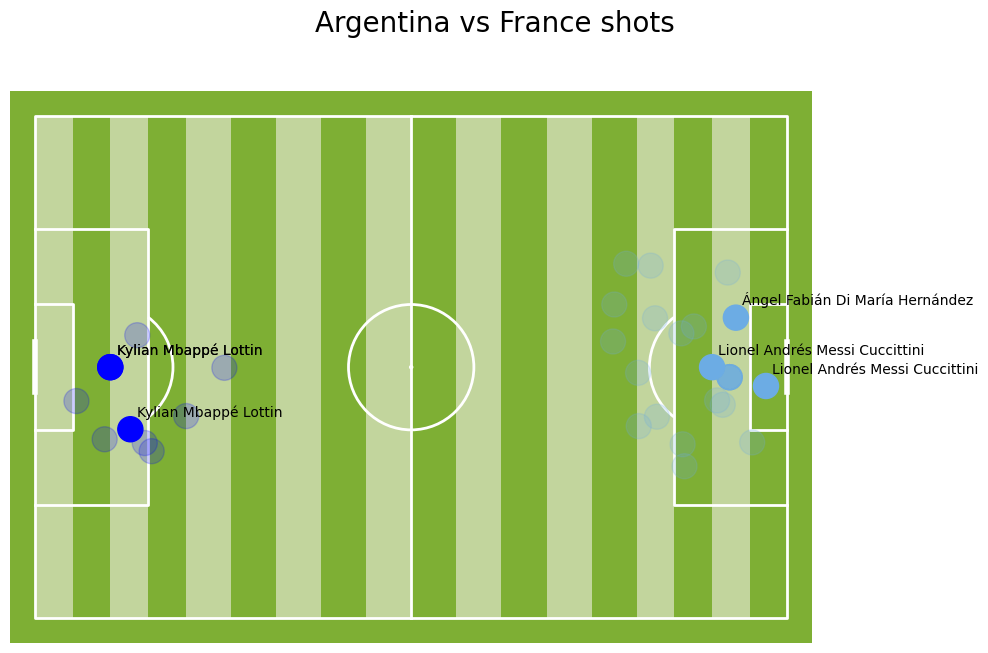

In [8]:
pitch = Pitch(pitch_color='#7eaf34',line_color='white',stripe=True)
fig,ax = pitch.draw(figsize=(10,7))
#size of the pitch in yards
pitchLengthX = 120
pitchWidthY = 80
# plotting the shots by looping through them
for i, shot in shots.iterrows():
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    period = shot['period']

#set circle size
    circleSize=2
#plot Argentina
    if (team_name==team1) and period<5:
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color='#6CACE4')
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color='#6CACE4')
            shotCircle.set_alpha(.2)
    
    #plot France
    if (team_name==team2) and period<5:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY-y),circleSize,color='blue')
            plt.text(pitchLengthX-x+1,pitchWidthY-y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY-y),circleSize,color='blue')
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)

fig.suptitle('Argentina vs France shots',fontsize=20)
fig.set_size_inches(10,7)
plt.show()

In [9]:
shots

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
id,,,,,,,,,,,,,,,,,,,,,
545c2c84-018f-4570-a01c-753823feaeac,192,1,00:04:40.798000,4,40,14,0.948190,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4ad26294-8aaf-4d69-83dd-bbf9ef797b32,340,1,00:07:36.537000,7,36,18,0.422018,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6d498191-05f0-432c-8764-03aea4ef9fb8,602,1,00:16:15.886000,16,15,27,0.872980,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6d527ebc-a948-4cd8-ac82-daced35bb715,771,1,00:22:24.114000,22,24,32,0.625635,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
f227a92e-d86c-4f3d-aa75-5ccb71adcae6,979,1,00:31:35.181000,31,35,46,3.284765,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,1178,1,00:35:22.647000,35,22,52,0.466153,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13a4889d-ad08-41be-9125-24c4c7d7879a,1916,2,00:03:49.971000,48,49,86,0.867950,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43691970-1dad-4e11-bd29-48f640c55ea1,2204,2,00:13:21.380000,58,21,107,0.426019,3869685,16,Shot,...,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN
9615ffbc-b513-45e6-9ccc-015234483f95,2235,2,00:14:51.755000,59,51,116,0.718656,3869685,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
cols = [ 'index', 'period', 'timestamp', 'possession',
       'duration', 'match_id', 'type_name','minute',
        'team_name', 'player_name','end_x', 'end_y', 'x', 'y','outcome_name',
         'shot_statsbomb_xg']

In [11]:
shots[cols]

,index,period,timestamp,possession,duration,match_id,type_name,minute,team_name,player_name,end_x,end_y,x,y,outcome_name,shot_statsbomb_xg
id,,,,,,,,,,,,,,,,
545c2c84-018f-4570-a01c-753823feaeac,192,1,00:04:40.798000,14,0.948190,3869685,Shot,4,Argentina,Alexis Mac Allister,117.3,38.3,92.4,30.0,Saved,0.024542
4ad26294-8aaf-4d69-83dd-bbf9ef797b32,340,1,00:07:36.537000,18,0.422018,3869685,Shot,7,Argentina,Rodrigo Javier De Paul,108.1,40.4,99.2,47.9,Blocked,0.062813
6d498191-05f0-432c-8764-03aea4ef9fb8,602,1,00:16:15.886000,27,0.872980,3869685,Shot,16,Argentina,Ángel Fabián Di María Hernández,120.0,39.6,103.1,34.6,Off T,0.106801
6d527ebc-a948-4cd8-ac82-daced35bb715,771,1,00:22:24.114000,32,0.625635,3869685,Shot,22,Argentina,Lionel Andrés Messi Cuccittini,120.0,41.8,108.0,40.0,Goal,0.783500
f227a92e-d86c-4f3d-aa75-5ccb71adcae6,979,1,00:31:35.181000,46,3.284765,3869685,Shot,31,Argentina,Alexis Mac Allister,112.3,80.0,94.3,23.5,Wayward,0.010578
ef86f4d9-7acd-4ed0-a5ec-9129079e8fbe,1178,1,00:35:22.647000,52,0.466153,3869685,Shot,35,Argentina,Ángel Fabián Di María Hernández,120.0,41.7,111.8,32.1,Goal,0.303409
13a4889d-ad08-41be-9125-24c4c7d7879a,1916,2,00:03:49.971000,86,0.867950,3869685,Shot,48,Argentina,Rodrigo Javier De Paul,117.6,41.6,103.3,52.3,Saved,0.040216
43691970-1dad-4e11-bd29-48f640c55ea1,2204,2,00:13:21.380000,107,0.426019,3869685,Shot,58,Argentina,Julián Álvarez,119.4,35.8,110.5,24.9,Saved,0.059534
9615ffbc-b513-45e6-9ccc-015234483f95,2235,2,00:14:51.755000,116,0.718656,3869685,Shot,59,Argentina,Lionel Andrés Messi Cuccittini,120.0,45.5,109.7,46.0,Off T,0.115560


In [12]:
df_competition[df_competition['competition_name']=='Premier League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851
65,2,44,England,Premier League,male,False,False,2003/2004,2024-03-08T14:49:13.195793,2021-06-13T16:17:31.694,None,2024-03-08T14:49:13.195793


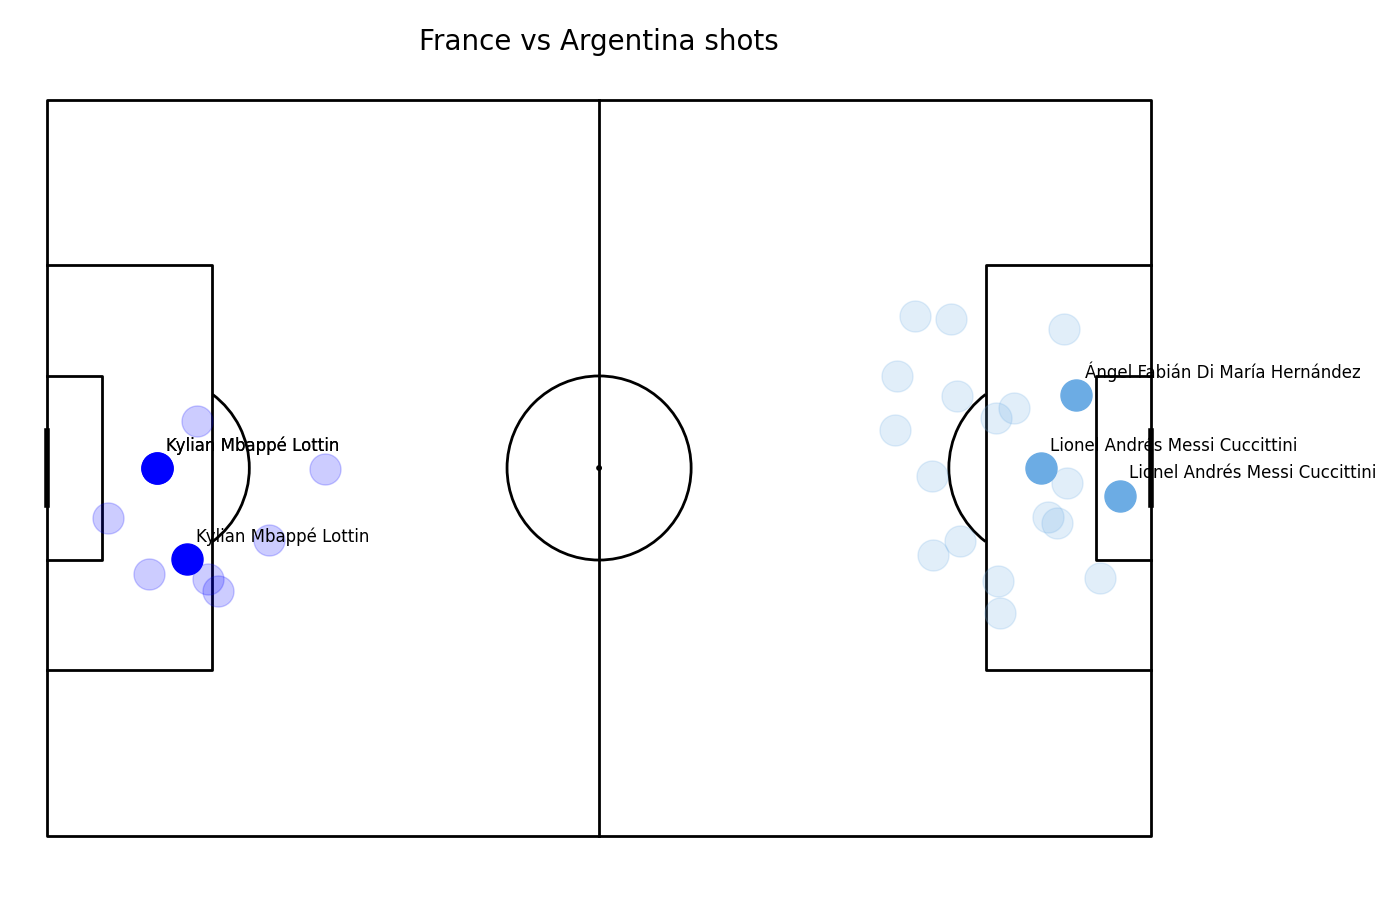

In [13]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

#query Argentina
mask_arg = (df['type_name']=='Shot')&(df['team_name']==team1)
df_arg = df[mask_arg][['period','x','y','outcome_name','player_name']]
df_arg = df_arg[df_arg['period']<5]

#plotting shots for argentina
for i, row in df_arg.iterrows():
    if row['outcome_name']=='Goal':
        pitch.scatter(row.x,row.y,alpha=1,s=500,color='#6CACE4',ax=ax['pitch'])
        pitch.annotate(row['player_name'],(row.x+1,row.y-2),ax=ax['pitch'],fontsize=12)
    else:
        pitch.scatter(row.x,row.y,alpha=0.2,s=500,color='#6CACE4',ax=ax['pitch'])

#query France
mask_fra = (df['type_name']=='Shot')&(df['team_name']==team2)
df_fra = df[mask_fra][['period','x','y','outcome_name','player_name']]
df_fra = df_fra[df_fra['period']<5]

#plotting France's shots
for i, row in df_fra.iterrows():
    if row['outcome_name']=='Goal':
        pitch.scatter(120-row.x,80-row.y,alpha=1,s=500,color='blue',ax=ax['pitch'])
        pitch.annotate(row['player_name'],(120-row.x+1,80-row.y-2),ax=ax['pitch'],fontsize=12)
    else:
        pitch.scatter(120-row.x,80-row.y,alpha=0.2,s=500,color='blue',ax=ax['pitch'])

fig.suptitle('France vs Argentina shots',fontsize=20)
plt.show()

In [14]:
df[mask_arg][['x','y']]

,x,y
191,92.4,30.0
339,99.2,47.9
601,103.1,34.6
770,108.0,40.0
978,94.3,23.5
1177,111.8,32.1
1916,103.3,52.3
2204,110.5,24.9
2235,109.7,46.0
2691,98.9,32.2


## Plotting shots on just one half of the field

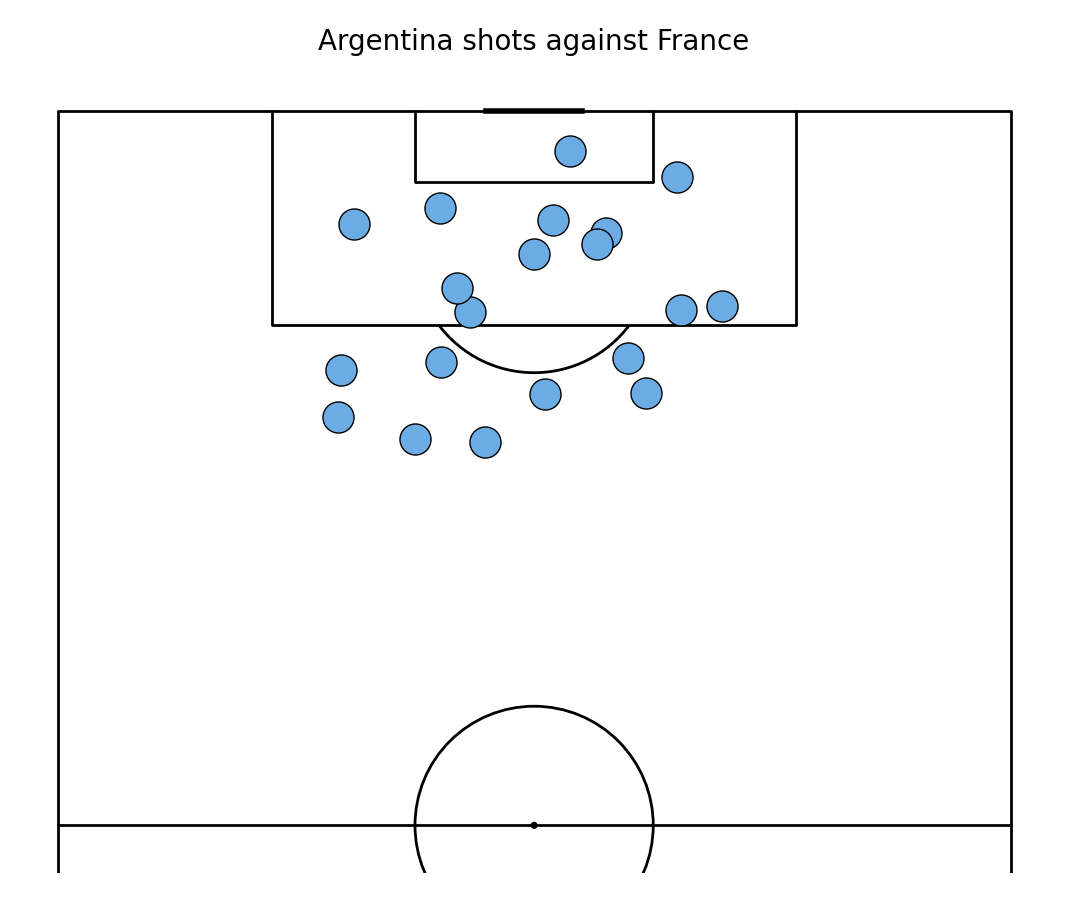

In [15]:
pitch = VerticalPitch(line_color='black',half=True)
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting shots
pitch.scatter(df_arg.x,df_arg.y,alpha=1,s=500,color='#6CACE4',ax=ax['pitch'],edgecolors='black')
fig.suptitle('Argentina shots against France',fontsize=20)
plt.show()

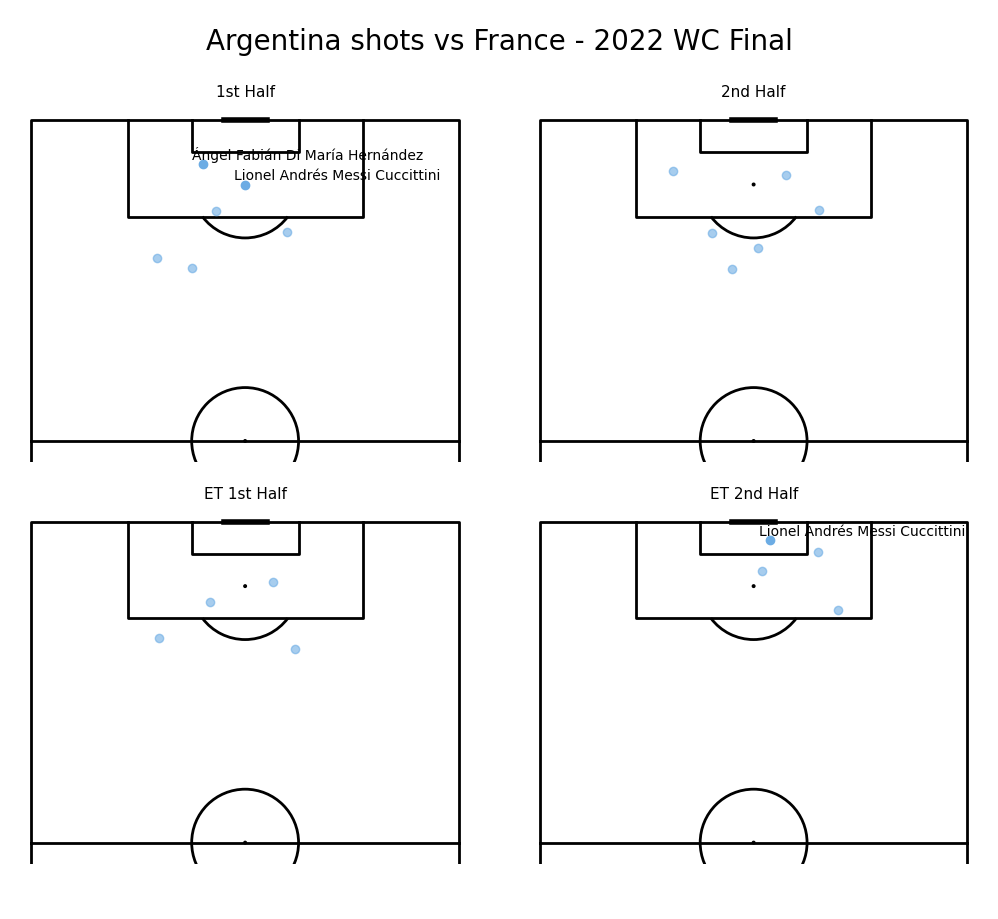

In [16]:
#draw 2x2 pitches
pitch = VerticalPitch(line_color='black',half=True)
fig, axs = pitch.grid(ncols=2,nrows=2, grid_height=0.85,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0.04,endnote_space=0.01)

df_arg['period'] = df_arg['period'].replace({1:'1st Half',2:'2nd Half',
                                            3:'ET 1st Half',4:'ET 2nd Half'})
period = df_arg['period'].unique()

for half, ax in zip(period, axs['pitch'].flat[:len(period)]):
    ax.set_title(half,fontsize=11,ha='center',va='center_baseline')
    #create df for only this player
    half_df = df_arg[df_arg['period']==half]
    for _,row in half_df.iterrows():
        if row['outcome_name']=='Goal':
            pitch.scatter(row['x'],row['y'],color='#6CACE4',ax=ax)
            pitch.annotate(row['player_name'],(row['x']+1,row['y']-2),ax=ax,fontsize=10)
        else:
            pitch.scatter(row['x'],row['y'],color='#6CACE4',alpha=.6,ax=ax)

fig.suptitle('Argentina shots vs France - 2022 WC Final',fontsize=20)
plt.show()

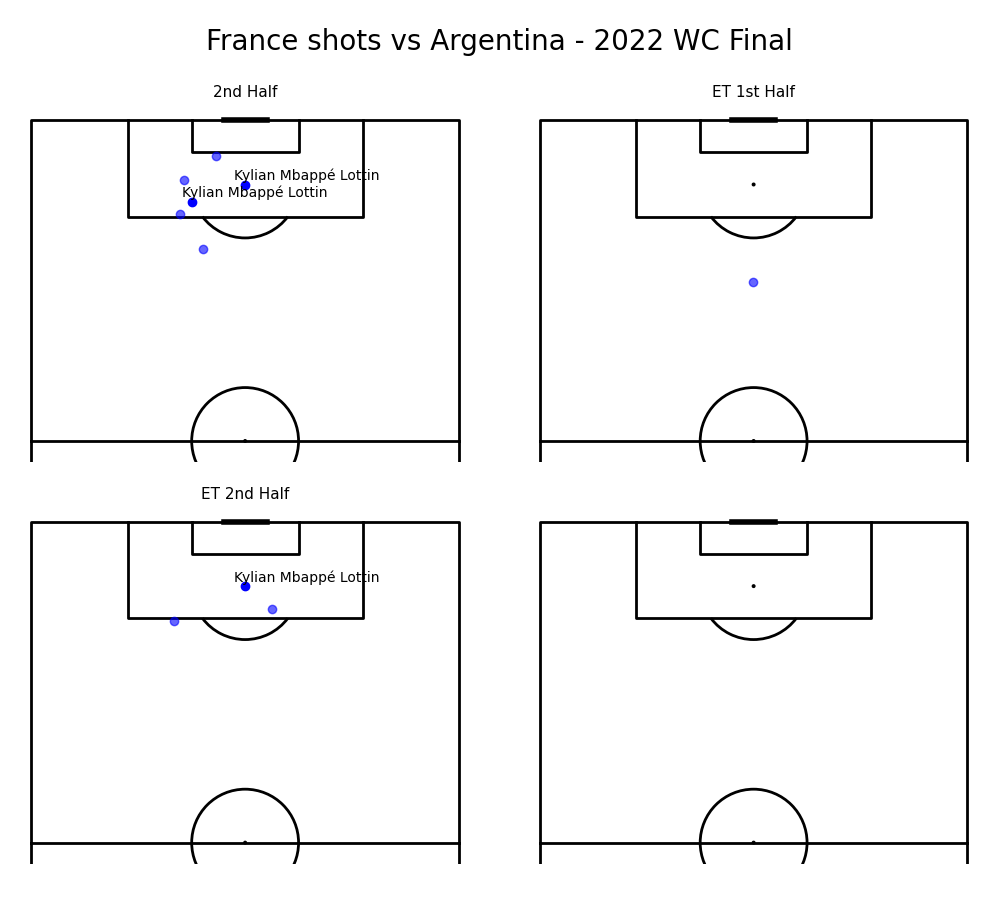

In [17]:
#draw 2x2 pitches
pitch = VerticalPitch(line_color='black',half=True)
fig, axs = pitch.grid(ncols=2,nrows=2, grid_height=0.85,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0.04,endnote_space=0.01)

df_fra['period'] = df_fra['period'].replace({1:'1st Half',2:'2nd Half',
                                            3:'ET 1st Half',4:'ET 2nd Half'})
period = df_fra['period'].unique()

for half, ax in zip(period, axs['pitch'].flat[:len(period)]):
    ax.set_title(half,fontsize=11,ha='center',va='center_baseline')
    #create df for only this player
    half_df = df_fra[df_fra['period']==half]
    for _,row in half_df.iterrows():
        if row['outcome_name']=='Goal':
            pitch.scatter(row['x'],row['y'],color='blue',ax=ax)
            pitch.annotate(row['player_name'],(row['x']+1,row['y']-2),ax=ax,fontsize=10)
        else:
            pitch.scatter(row['x'],row['y'],color='blue',alpha=.6,ax=ax)

fig.suptitle('France shots vs Argentina - 2022 WC Final',fontsize=20)
plt.show()

In [18]:
df_arg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 191 to 4356
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   period        20 non-null     object 
 1   x             20 non-null     float64
 2   y             20 non-null     float64
 3   outcome_name  20 non-null     object 
 4   player_name   20 non-null     object 
dtypes: float64(2), object(3)
memory usage: 960.0+ bytes


## Challenge

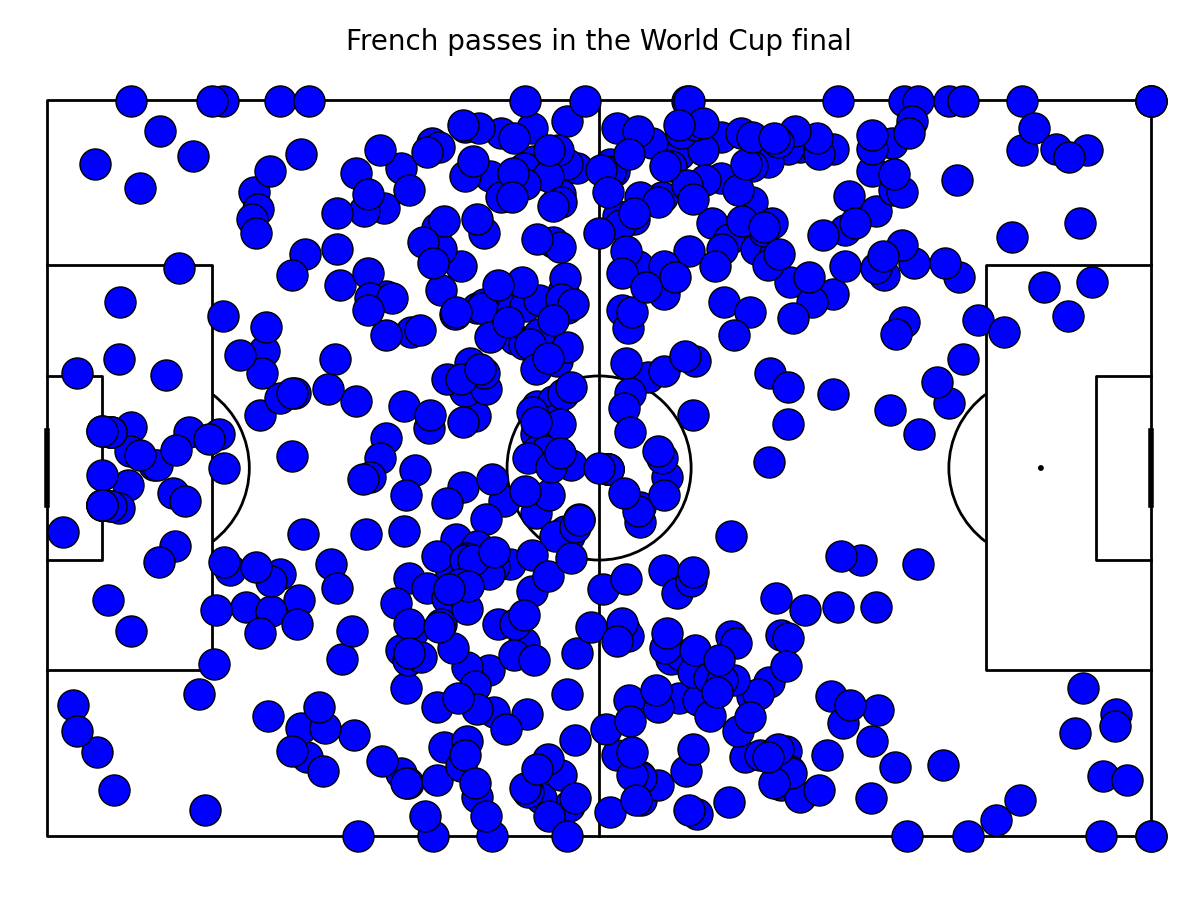

In [19]:
# create a dataframe of passes which contain all passes in the match
passes = df[df.type_name=='Pass']

#plotting the startpoint of every French pass. Attacking left to right
passes = passes[['x','y','end_x','end_y','outcome_name','player_name']]

pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

#query French passes
pass_mask_fra = (df['type_name']=='Pass')&(df['team_name']==team2)
df_pass_fra = df[pass_mask_fra][['period','x','y','end_x','end_y','outcome_name','player_name']]

#plotting shots for argentina
pitch.scatter(df_pass_fra.x,df_pass_fra.y,alpha=1,s=500,color='blue',ax=ax['pitch'],edgecolors='black')
fig.suptitle("French passes in the World Cup final",fontsize=20)
plt.show()

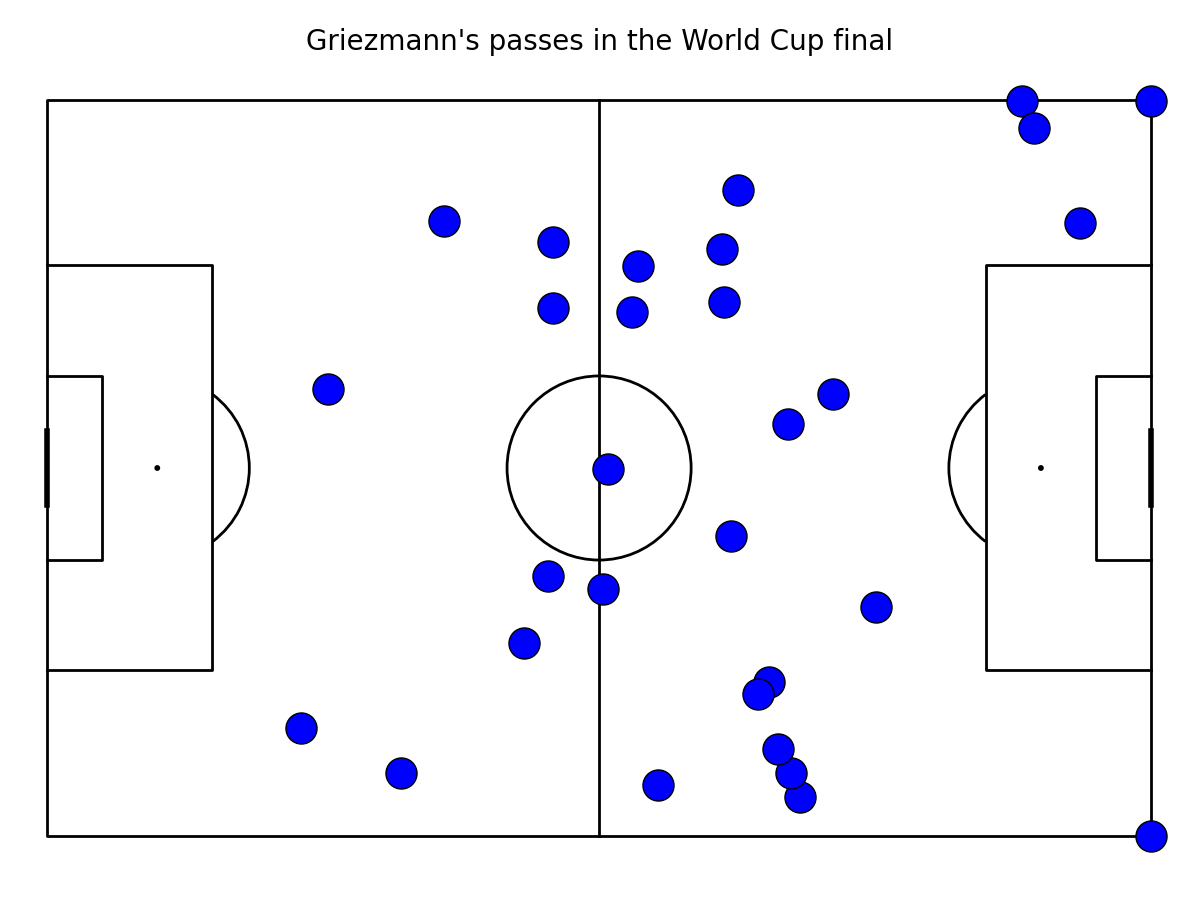

In [20]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

pass_mask_fra = (df['type_name']=='Pass')&(df['team_name']==team2)
df_pass_fra = df[pass_mask_fra][['period','x','y','end_x','end_y','outcome_name','player_name']]
ant_griz_pass = df_pass_fra[df_pass_fra['player_name']=='Antoine Griezmann']


#plotting shots for argentina
pitch.scatter(ant_griz_pass.x,ant_griz_pass.y,alpha=1,s=500,color='blue',ax=ax['pitch'],edgecolors='black')
fig.suptitle("Griezmann's passes in the World Cup final",fontsize=20)
plt.show()

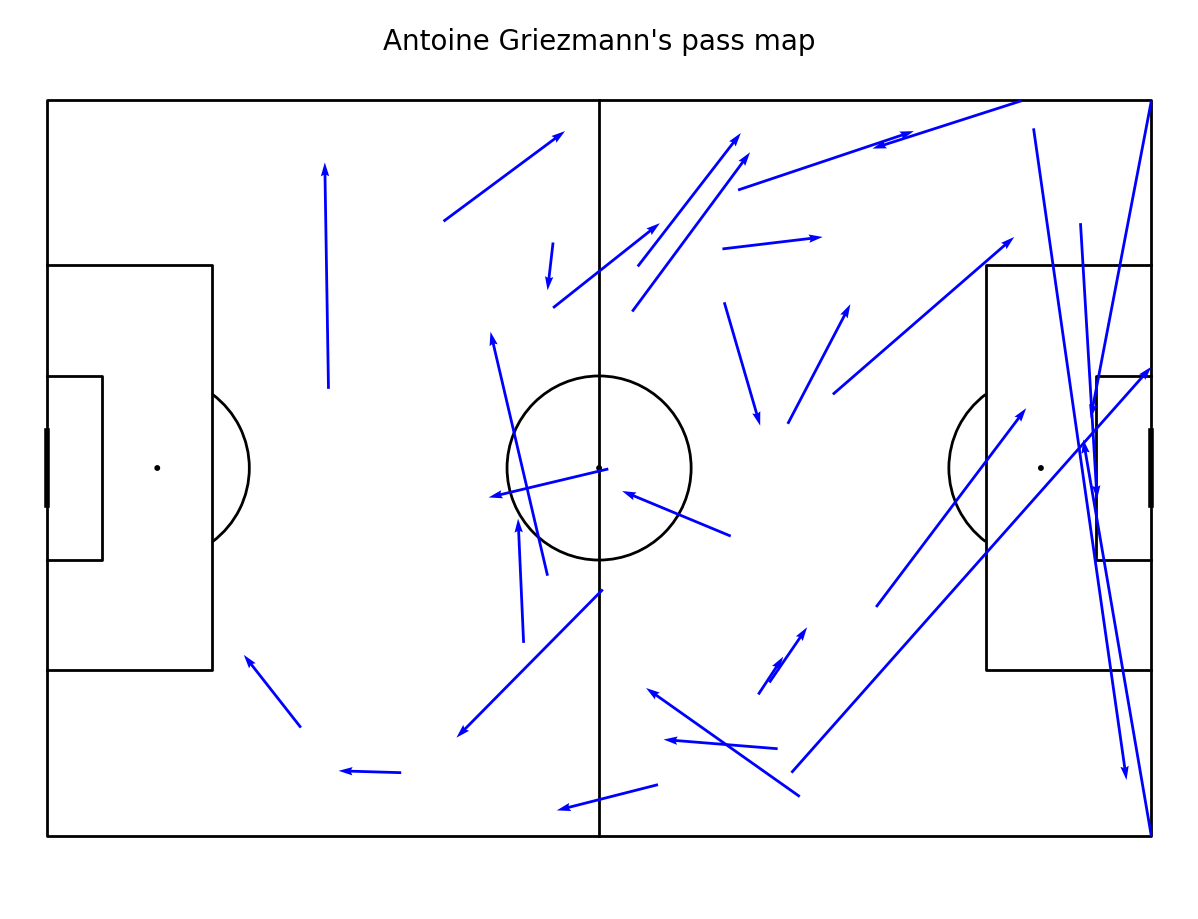

In [21]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

pitch.arrows(ant_griz_pass['x'],ant_griz_pass.y,ant_griz_pass.end_x,ant_griz_pass.end_y,width=2,color='blue',ax=ax['pitch'])
fig.suptitle(f"{ant_griz_pass.player_name.iloc[0]}'s pass map",fontsize=20)
plt.show()

# Plotting passes

In [22]:
df_competition[(df_competition['competition_name']=='UEFA Euro')&(df_competition['season_name']=='2024')][['competition_id','season_id']]

,competition_id,season_id
68,55,282


In [23]:
df_matches = parser.match(competition_id=55,season_id=282)
df_matches[df_matches['competition_stage_name']=='Final'].match_id

1    3943043
Name: match_id, dtype: int64

In [24]:
eurf_df,eurf_related,eurf_freeze,eurf_tactics = parser.event(3943043)

eurf_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,block_offensive,shot_deflected,block_deflection,foul_committed_offensive,injury_stoppage_in_chain,substitution_replacement_id,substitution_replacement_name,pass_goal_assist,pass_cut_back,block_save_block
0,50aa204f-5d65-4145-8597-5d5628fb7898,1,1,00:00:00,0,0,1,0.000000,3943043,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a279cbee-9ab3-4cfb-9c51-27cacc1bf2a2,2,1,00:00:00,0,0,1,0.000000,3943043,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d2126e70-9f04-4bb7-ba2b-9377836d1757,3,1,00:00:00,0,0,1,0.000000,3943043,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54d78bfa-4146-42bd-acdc-97bcd393dd81,4,1,00:00:00,0,0,1,0.000000,3943043,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,152820f0-6ca9-4df3-943b-a67d568ff472,5,1,00:00:00.340000,0,0,2,2.529454,3943043,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
passes = eurf_df[eurf_df['type_name']=='Pass'][eurf_df['sub_type_name']!='Throw-in'].set_index('id')

In [26]:
df_competition[df_competition['competition_name']=='UEFA Euro'][df_competition['season_name']=='2024']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500


In [27]:
passes.player_name.unique()

array(['Kobbie Mainoo', 'Jordan Pickford', 'Unai Simón Mendibil',
       'Robin Aime Robert Le Normand', 'Daniel Carvajal Ramos',
       'Álvaro Borja Morata Martín', 'Daniel Olmo Carvajal',
       'Jude Bellingham', 'Rodrigo Hernández Cascante', 'Aymeric Laporte',
       'Luke Shaw', 'Declan Rice', 'Marc Guehi', 'Phil Foden',
       'Kyle Walker', 'Lamine Yamal Nasraoui Ebana',
       'Marc Cucurella Saseta', 'Nicholas Williams Arthuer', 'Harry Kane',
       'Bukayo Saka', 'Fabián Ruiz Peña', 'John Stones',
       'Martín Zubimendi Ibáñez', 'Cole Palmer', 'Mikel Oyarzabal Ugarte',
       'José Ignacio Fernández Iglesias', 'Ollie Watkins'], dtype=object)

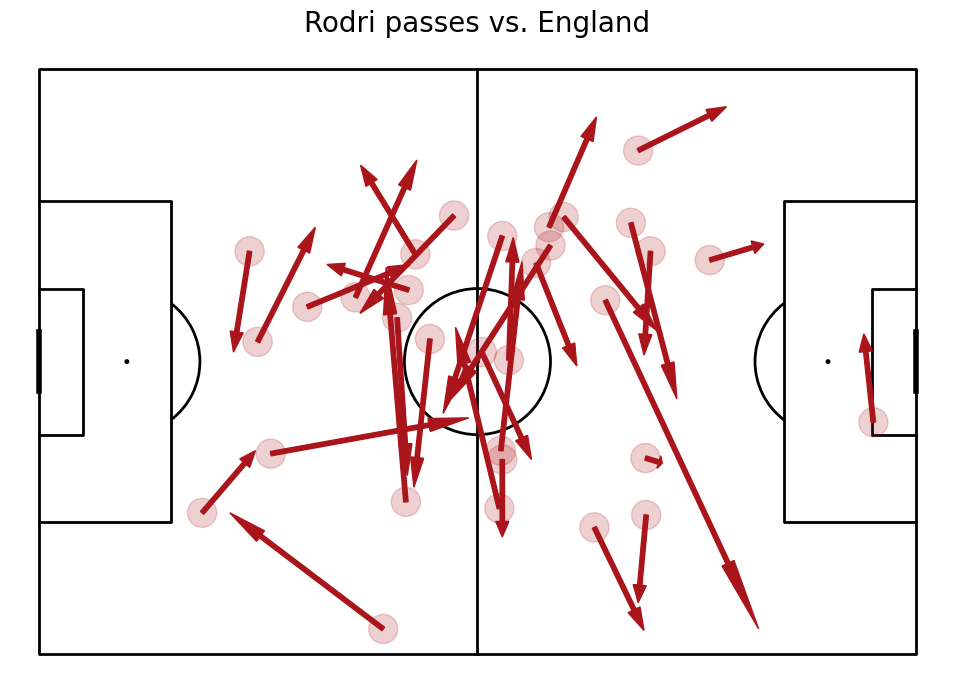

In [28]:
pitch = Pitch(line_color='black')
fig, ax = pitch.draw(figsize=(10,7))


for i, thepass in passes.iterrows():
    if thepass['player_name']=='Rodrigo Hernández Cascante':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color='#aa151b')
        passCircle.set_alpha(0.2)
        ax.add_patch(passCircle)
        dx=thepass['end_x']-x
        dy=thepass['end_y']-y
        #plot arrows
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color='#aa151b')
        ax.add_patch(passArrow)

ax.set_title("Rodri passes vs. England",fontsize=20)
fig.set_size_inches(10,7)
plt.show()

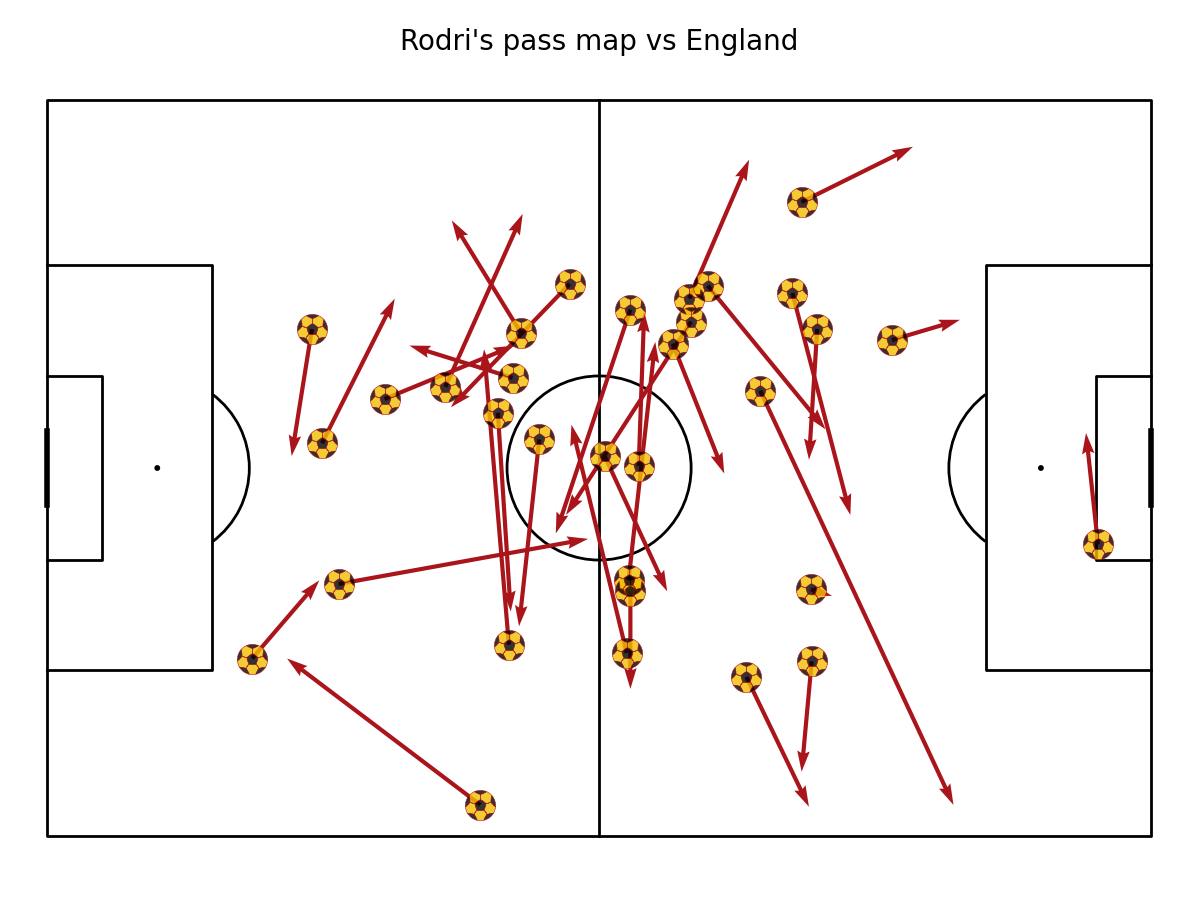

In [29]:

pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

rodri_passes = passes[passes['player_name']=='Rodrigo Hernández Cascante']

pitch.arrows(rodri_passes['x'],rodri_passes['y'],rodri_passes['end_x'],rodri_passes['end_y'],
             width=3,color='#aa151b',ax=ax['pitch'])

pitch.scatter(rodri_passes['x'],rodri_passes['y'],marker='football',c='#f1bf00',edgecolor='#aa151b',ax=ax['pitch'],alpha=.8)

fig.suptitle("Rodri's pass map vs England",fontsize=20)
plt.show()

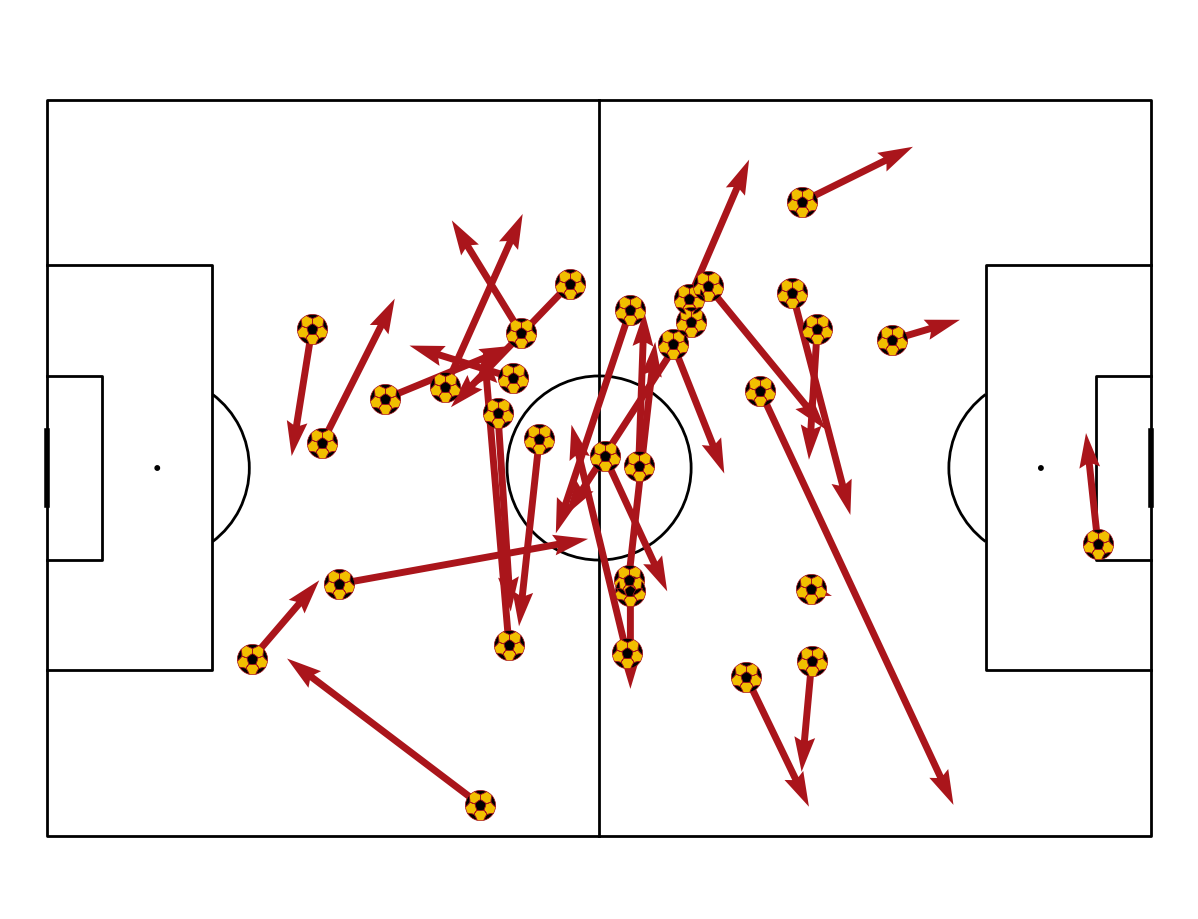

In [30]:
pitch = Pitch(line_color='black')
fig,ax = pitch.grid(grid_height=0.9, title_height=0.06,axis=False,
                   endnote_height=0.04,title_space=0,endnote_space=0)

#query Spain
mask_rodri = (passes['team_name']=='Spain')&(passes['player_name']=='Rodrigo Hernández Cascante')
rodri_pass = passes[mask_rodri][['period','x','y','end_x','end_y']]

#plotting rodri's passes
pitch.arrows(rodri_pass['x'],rodri_pass['y'],rodri_pass['end_x'],rodri_pass['end_y'],width=5,
             color='#aa151b',ax=ax['pitch'])
pitch.scatter(rodri_pass['x'],rodri_pass['y'],marker='football',c='#f1bf00',edgecolor='#aa151b',ax=ax['pitch'])
plt.show()

## Plotting multiple pass maps on one figure

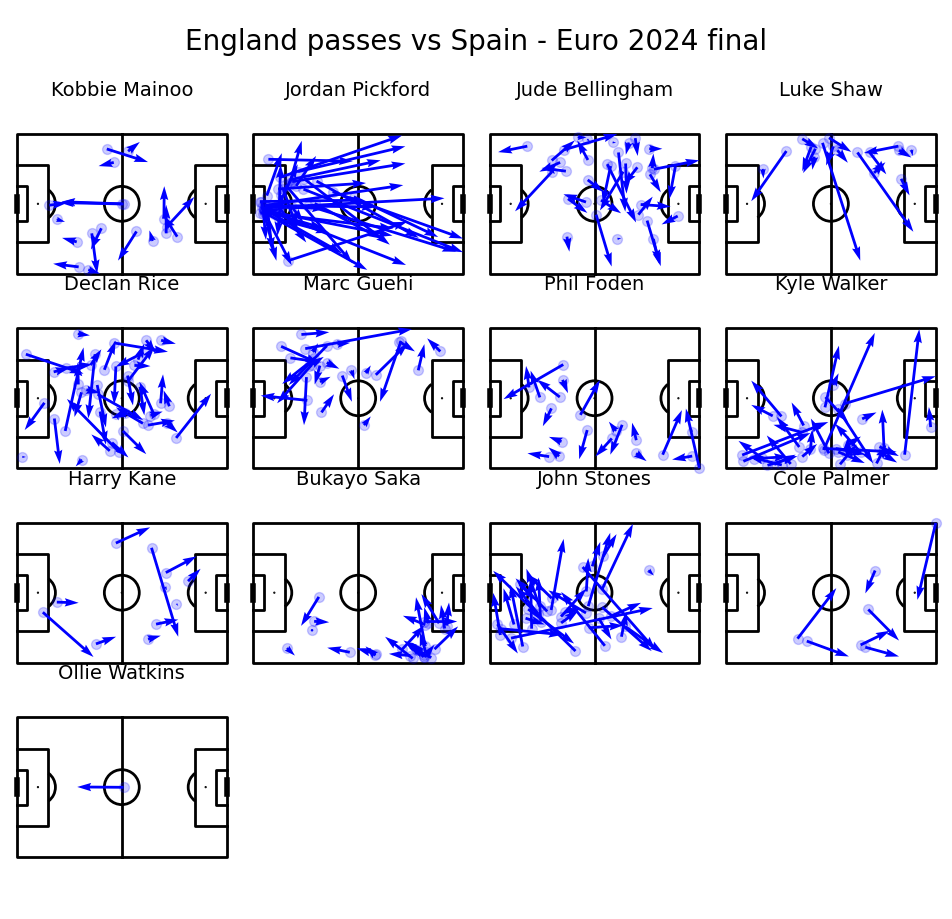

In [33]:
#English passes that weren't throw-ins
mask_ENG = (passes.team_name=='England')&(passes.sub_type_name != 'Throw-in')
ENG_passes = passes[mask_ENG][['x','y','end_x','end_y','player_name']]
#list of players who made a pass
ENG_names = ENG_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black',pad_top=20)
fig, axs = pitch.grid(ncols=4,nrows=4, grid_height=0.85,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0.04,endnote_space=0.01)

#pass maps for each player
for name, ax in zip(ENG_names, axs['pitch'].flat[:len(ENG_names)]):
    ax.set_title(name,fontsize=14,ha='center',va='center')
    #create df for only this player
    player_df = ENG_passes[ENG_passes['player_name']==name]
    pitch.scatter(player_df['x'],player_df['y'],alpha=.2,s=50,c='blue',ax=ax)
    pitch.arrows(player_df['x'],player_df['y'],player_df['end_x'],player_df['end_y'],color='blue',ax=ax,width=2)

for ax in axs['pitch'][-1,1:]:
    ax.remove()

fig.suptitle('England passes vs Spain - Euro 2024 final',fontsize=20)
plt.show()

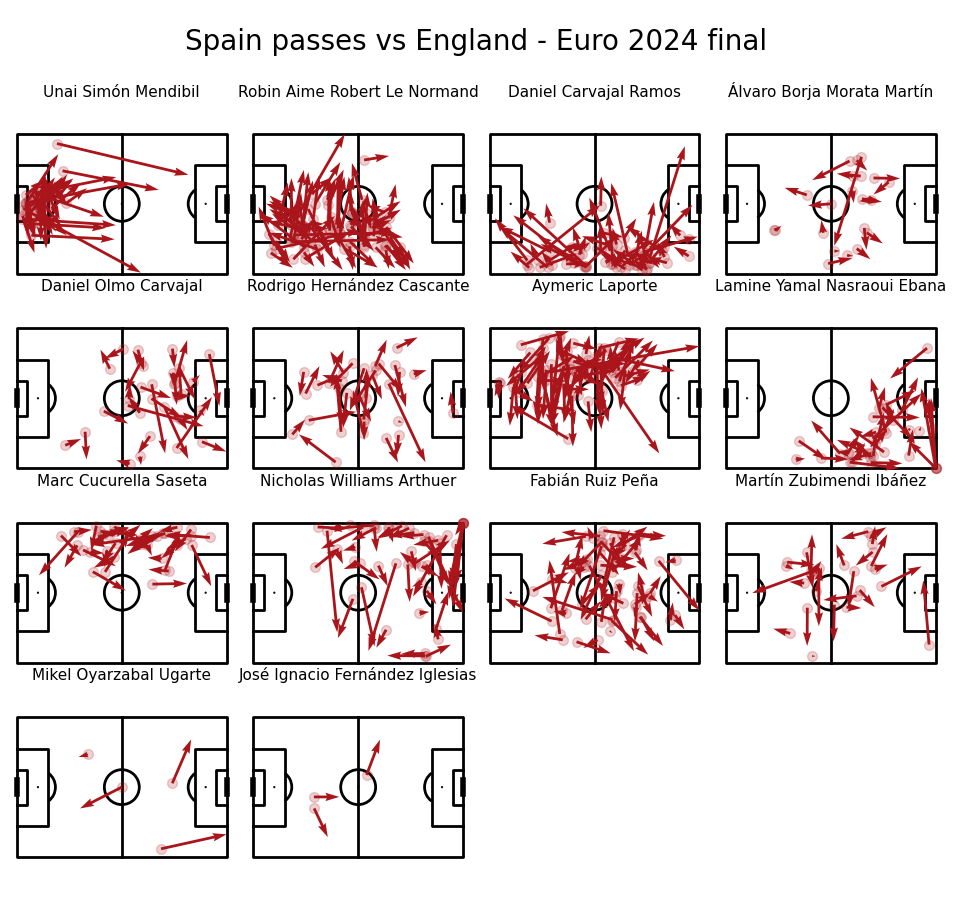

In [34]:
#English passes that weren't throw-ins
mask_ESP = (passes.team_name=='Spain')&(passes.sub_type_name != 'Throw-in')
ESP_passes = passes[mask_ESP][['x','y','end_x','end_y','player_name']]
#list of players who made a pass
ESP_names = ESP_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black',pad_top=20)
fig, axs = pitch.grid(ncols=4,nrows=4, grid_height=0.85,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0.04,endnote_space=0.01)

#pass maps for each player
for name, ax in zip(ESP_names, axs['pitch'].flat[:len(ESP_names)]):
    ax.set_title(name,fontsize=11,ha='center',va='center_baseline')
    #create df for only this player
    player_df = ESP_passes[ESP_passes['player_name']==name]
    pitch.scatter(player_df['x'],player_df['y'],alpha=.2,s=50,c='#aa151b',ax=ax)
    pitch.arrows(player_df['x'],player_df['y'],player_df['end_x'],player_df['end_y'],color='#aa151b',ax=ax,width=2)

for ax in axs['pitch'][-1,2:]:
    ax.remove()

fig.suptitle('Spain passes vs England - Euro 2024 final',fontsize=20)
plt.show()

In [35]:
passes.team_name.unique()

array(['England', 'Spain'], dtype=object)

# Plotting Passing Networks

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen

In [37]:
parser = Sbopen()
df_competitions = parser.competition()

laliga_mask = (df_competitions['competition_name']=='La Liga')&(df_competitions['season_name']=='2016/2017')

df_competitions[laliga_mask][['competition_id','season_id']]

,competition_id,season_id
42,11,2


In [38]:
df_matches = parser.match(competition_id=11,season_id=2)

match_mask = (df_matches['home_team_name']=='Real Madrid')&(df_matches['away_team_name']=='Barcelona')

df_matches[match_mask].match_id

2    267569
Name: match_id, dtype: int64

In [39]:
df_lineup = parser.lineup(267569)
df_lineup = df_lineup[['player_id','player_nickname']]

In [40]:
parser=Sbopen()
df = parser.event(267569)[0]

In [41]:
first_sub = df[df['type_name']=='Substitution'].loc[df["team_name"]=="Barcelona"].iloc[0]['index']
#filters for the dataset
barca_mask = (df.type_name=='Pass')&(df.team_name=='Barcelona')&(df.index<first_sub)&(df.outcome_name.isna())&(df.sub_type_name!='Throw-in')

#getting our Barca pass data
barca_pass=df[barca_mask][['x','y','end_x','end_y','player_id','player_name','pass_recipient_id','pass_recipient_name']]

#putting player nicknames in
barca_pass=barca_pass.merge(df_lineup,how='left',on='player_id')
barca_pass.drop(columns=['player_id','player_name'],inplace=True)
barca_pass=barca_pass.rename(columns={'player_nickname':'player_name'})

barca_pass=barca_pass.merge(df_lineup,how='left',left_on='pass_recipient_id',right_on='player_id')
barca_pass.drop(columns=['player_id','pass_recipient_id','pass_recipient_name'],inplace=True)
barca_pass=barca_pass.rename(columns={'player_nickname':'pass_recipient_name'})

#adjusting for player names
barca_pass['player_name'] = barca_pass["player_name"].apply(lambda x: str(x).split()[0][0]+". "+str(x).split()[-1])
barca_pass['pass_recipient_name'] = barca_pass['pass_recipient_name'].apply(lambda x: str(x).split()[0][0]+". "+str(x).split()[-1])

In [42]:
#creating an empty dataframe for vertices size and location
scatter_df = pd.DataFrame()

for i, name in enumerate(barca_pass["player_name"].unique()):
    passx = barca_pass[barca_pass["player_name"]==name]["x"].to_numpy()
    recx = barca_pass[barca_pass['player_name']==name]['end_x'].to_numpy()
    passy = barca_pass[barca_pass["player_name"]==name]["y"].to_numpy()
    recy = barca_pass[barca_pass['player_name']==name]['end_y'].to_numpy()
    scatter_df.at[i,"player_name"]= name
    #finding the average location that each player operates(where they start and receive passes)
    scatter_df.at[i,'x']=np.mean(np.concatenate([passx,recx]))
    scatter_df.at[i,'y']=np.mean(np.concatenate([passy,recy]))
    #add the number of passes
    scatter_df.at[i,"no"] = barca_pass[barca_pass["player_name"]==name].count().iloc[0]
    #adjusting marker size so we can see the most influential players
    scatter_df['marker_size'] = (scatter_df['no']/scatter_df['no'].max()*1500)
    

In [43]:
barca_pass["pair_key"] = barca_pass.apply(lambda x:"_".join(sorted([x['player_name'],x['pass_recipient_name']])),axis=1)
lines_df = barca_pass.groupby(['pair_key']).x.count().reset_index()
lines_df = lines_df.rename(columns={'x':'pass_count'})
lines_df = lines_df[lines_df['pass_count']>2]

In [44]:
lines_df.sort_values('pass_count',ascending=False)

,pair_key,pass_count
2,A. Iniesta_J. Alba,23
14,G. Piqué_S. Roberto,21
3,A. Iniesta_L. Messi,20
8,A. Iniesta_S. Umtiti,19
44,M. Stegen_S. Umtiti,18
21,I. Rakitić_S. Busquets,18
34,L. Messi_S. Busquets,18
48,S. Busquets_S. Umtiti,16
6,A. Iniesta_S. Busquets,16
12,G. Piqué_M. Stegen,15


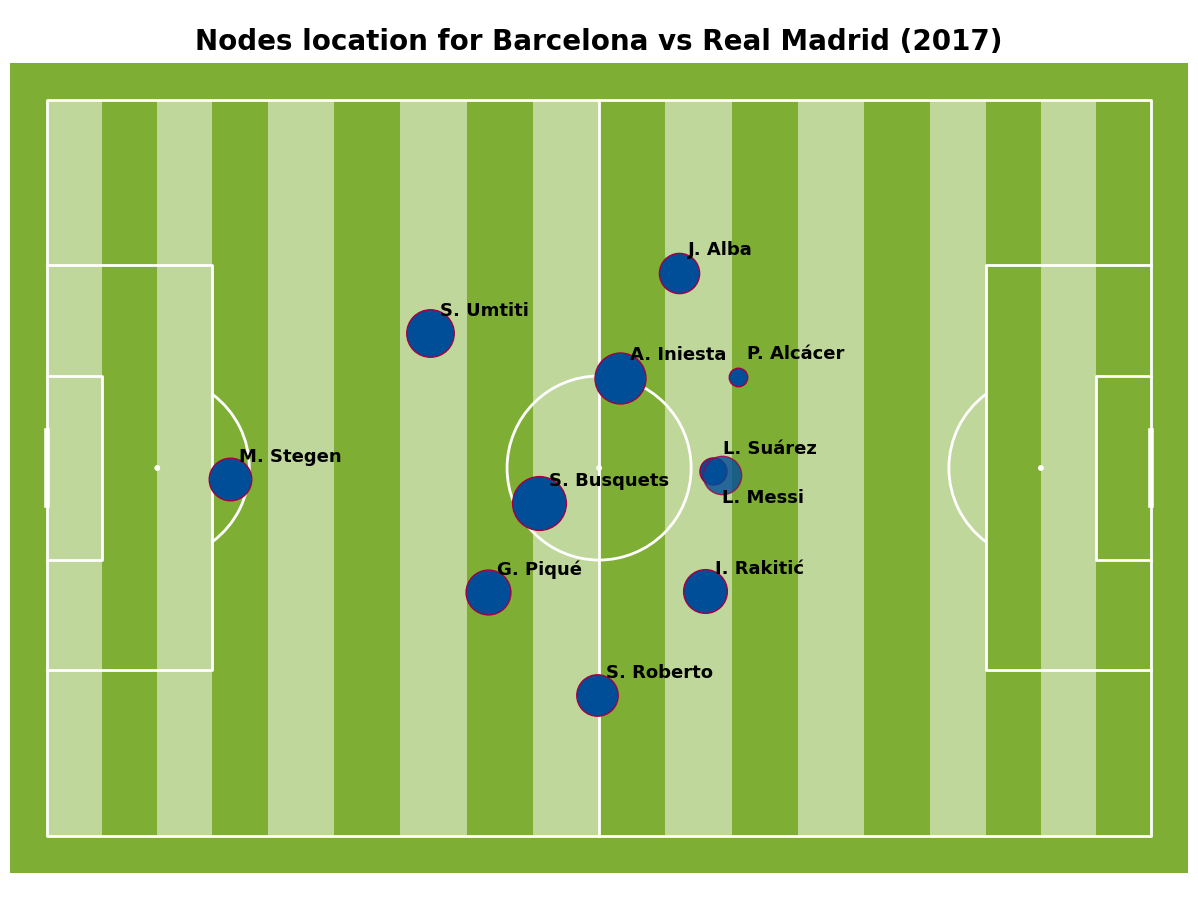

In [45]:
#plotting the pitch and points

pitch = Pitch(pitch_color='#7eaf34',line_color='white',stripe=True,stripe_color='#bfd79a')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)




for i, row in scatter_df.iterrows():
    if row.player_name=='L. Messi':
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004D98',edgecolor='#a50044',alpha=.8)
        pitch.annotate(row.player_name,(row.x,row.y+3),ax=ax['pitch'],weight='bold',size=13)
    else:
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004D98',edgecolor='#a50044')
        pitch.annotate(row.player_name,(row.x+1,row.y-2),ax=ax['pitch'],weight='bold',size=13)

fig.suptitle("Nodes location for Barcelona vs Real Madrid (2017)",fontsize=20,weight='bold')
plt.show()

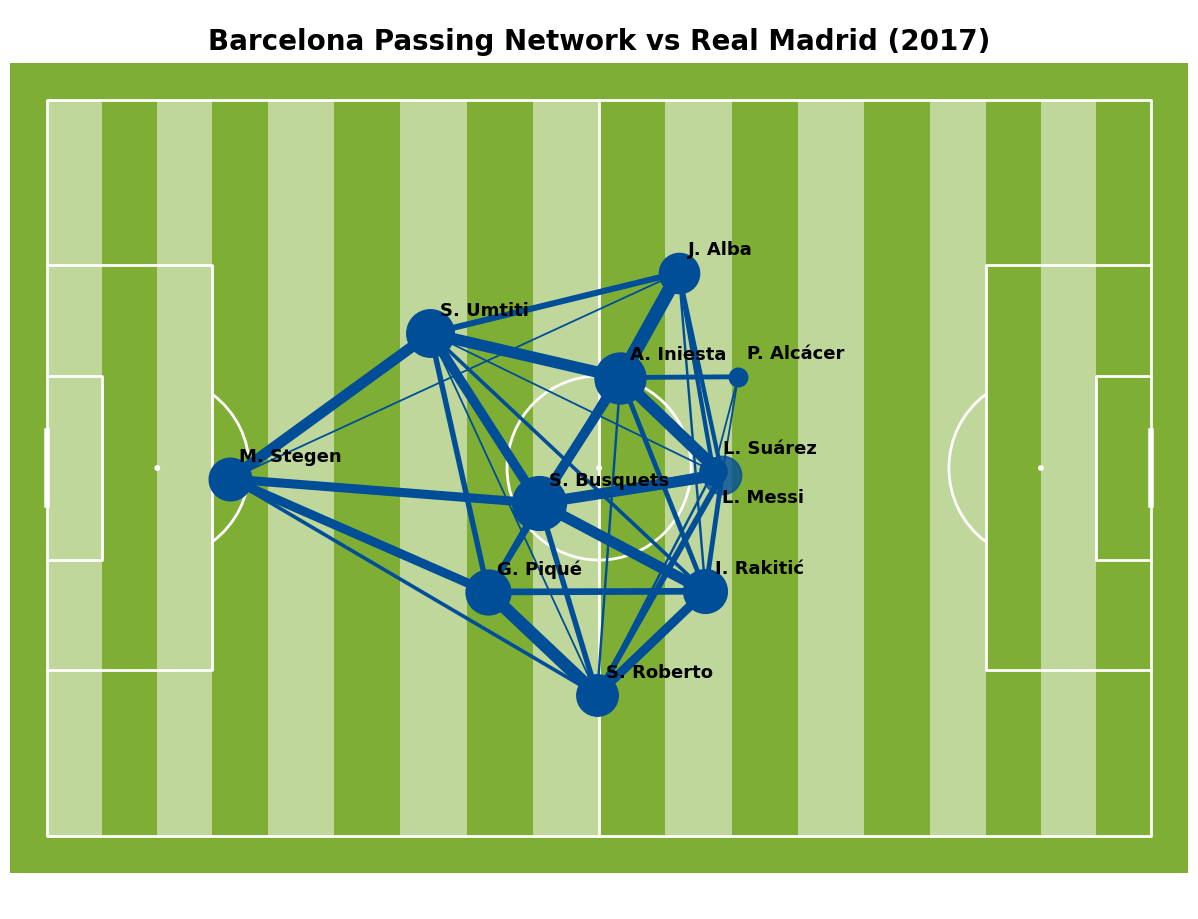

In [46]:
#plotting the pitch and points

pitch = Pitch(pitch_color='#7eaf34',line_color='white',stripe=True,stripe_color='#bfd79a')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)




for i, row in scatter_df.iterrows():
    if row.player_name=='L. Messi':
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004d98',alpha=.8)
        pitch.annotate(row.player_name,(row.x,row.y+3),ax=ax['pitch'],weight='bold',size=13)
    else:
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004d98')
        pitch.annotate(row.player_name,(row.x+1,row.y-2),ax=ax['pitch'],weight='bold',size=13)


for i, row in lines_df.iterrows():
    player1 = row['pair_key'].split('_')[0]
    player2 = row['pair_key'].split('_')[1]
    #taking the avg location of players to plot the lines between them
    player1_x = scatter_df[scatter_df['player_name']==player1]['x'].iloc[0]
    player1_y = scatter_df[scatter_df['player_name']==player1]['y'].iloc[0]
    player2_x = scatter_df[scatter_df['player_name']==player2]['x'].iloc[0]
    player2_y = scatter_df[scatter_df['player_name']==player2]['y'].iloc[0]
    num_passes = row['pass_count']
    #adjusting for line width
    line_width = (num_passes / lines_df['pass_count'].max()*10)
    #plot lines on the pitch
    pitch.lines(player1_x,player1_y,player2_x,player2_y,lw=line_width,
               color='#004d98',ax=ax['pitch'])


fig.suptitle("Barcelona Passing Network vs Real Madrid (2017)",fontsize=20,weight='bold')
plt.show()

## Centralisation

To calculate the centralisation index we need to calculate number of passes made by each player. Then, we calculate the denominator - the sum of all passes multiplied by (number of players - 1) -> 10 To calculate the numerator we sum the difference between maximal number of successful passes by 1 player and number of successful passes by each player. We calculate the index dividing the numerator by denominator.

In [47]:
#calculate the number of successful passes by player
no_passes = barca_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'},axis='columns',inplace=True)
#find the player with the most passes
most_passes = no_passes['pass_count'].max()
#calculate the denominator
denominator=10*no_passes['pass_count'].sum()
#calculate the numerator
numerator = (most_passes-no_passes['pass_count']).sum()
#calculate centralisation index
centralisation_index = numerator/denominator
print(f"Centralisation index is {centralisation_index: .2f}")

Centralisation index is  0.06


## Challenge

Make a passing network only with passes forward for Barca

In [48]:
forward_pass = barca_pass[barca_pass['x']<barca_pass['end_x']]

In [49]:
#creating an empty dataframe for vertices size and location
forward_scatter_df = pd.DataFrame()

for i, name in enumerate(forward_pass["player_name"].unique()):
    passx = forward_pass[forward_pass["player_name"]==name]["x"].to_numpy()
    recx = forward_pass[forward_pass['player_name']==name]['end_x'].to_numpy()
    passy = forward_pass[forward_pass["player_name"]==name]["y"].to_numpy()
    recy = forward_pass[forward_pass['player_name']==name]['end_y'].to_numpy()
    forward_scatter_df.at[i,"player_name"]= name
    #finding the average location that each player operates(where they start and receive passes)
    forward_scatter_df.at[i,'x']=np.mean(np.concatenate([passx,recx]))
    forward_scatter_df.at[i,'y']=np.mean(np.concatenate([passy,recy]))
    #add the number of passes
    forward_scatter_df.at[i,"no"] = forward_pass[forward_pass["player_name"]==name].count().iloc[0]
    #adjusting marker size so we can see the most influential players
    forward_scatter_df['marker_size'] = (forward_scatter_df['no']/forward_scatter_df['no'].max()*1500)
    

In [50]:
forward_pass["pair_key"] = forward_pass.apply(lambda x:"_".join(sorted([x['player_name'],x['pass_recipient_name']])),axis=1)
f_lines_df = forward_pass.groupby(['pair_key']).x.count().reset_index()
f_lines_df = f_lines_df.rename(columns={'x':'pass_count'})
f_lines_df = f_lines_df[f_lines_df['pass_count']>2]

/tmp/ipykernel_35/1755634532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forward_pass["pair_key"] = forward_pass.apply(lambda x:"_".join(sorted([x['player_name'],x['pass_recipient_name']])),axis=1)


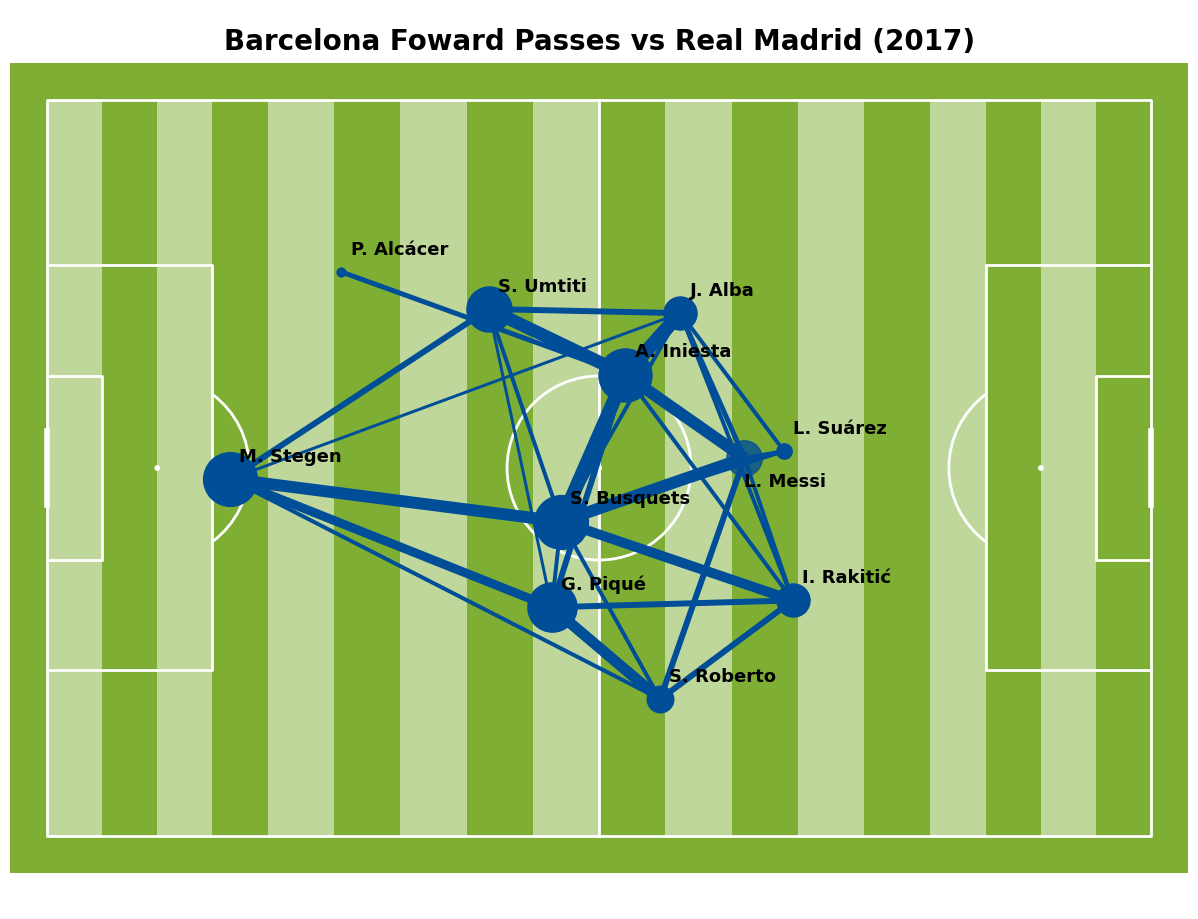

In [51]:
#plotting the pitch and points

pitch = Pitch(pitch_color='#7eaf34',line_color='white',stripe=True,stripe_color='#bfd79a')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)




for i, row in forward_scatter_df.iterrows():
    if row.player_name=='L. Messi':
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004d98',alpha=.8)
        pitch.annotate(row.player_name,(row.x,row.y+3),ax=ax['pitch'],weight='bold',size=13)
    else:
        pitch.scatter(row['x'],row['y'],s=row['marker_size'],ax=ax['pitch'],c='#004d98')
        pitch.annotate(row.player_name,(row.x+1,row.y-2),ax=ax['pitch'],weight='bold',size=13)


for i, row in f_lines_df.iterrows():
    player1 = row['pair_key'].split('_')[0]
    player2 = row['pair_key'].split('_')[1]
    #taking the avg location of players to plot the lines between them
    player1_x = forward_scatter_df[forward_scatter_df['player_name']==player1]['x'].iloc[0]
    player1_y = forward_scatter_df[forward_scatter_df['player_name']==player1]['y'].iloc[0]
    player2_x = forward_scatter_df[forward_scatter_df['player_name']==player2]['x'].iloc[0]
    player2_y = forward_scatter_df[forward_scatter_df['player_name']==player2]['y'].iloc[0]
    num_passes = row['pass_count']
    #adjusting for line width
    line_width = (num_passes / f_lines_df['pass_count'].max()*10)
    #plot lines on the pitch
    pitch.lines(player1_x,player1_y,player2_x,player2_y,lw=line_width,
               color='#004d98',ax=ax['pitch'])


fig.suptitle("Barcelona Foward Passes vs Real Madrid (2017)",fontsize=20,weight='bold')
plt.show()

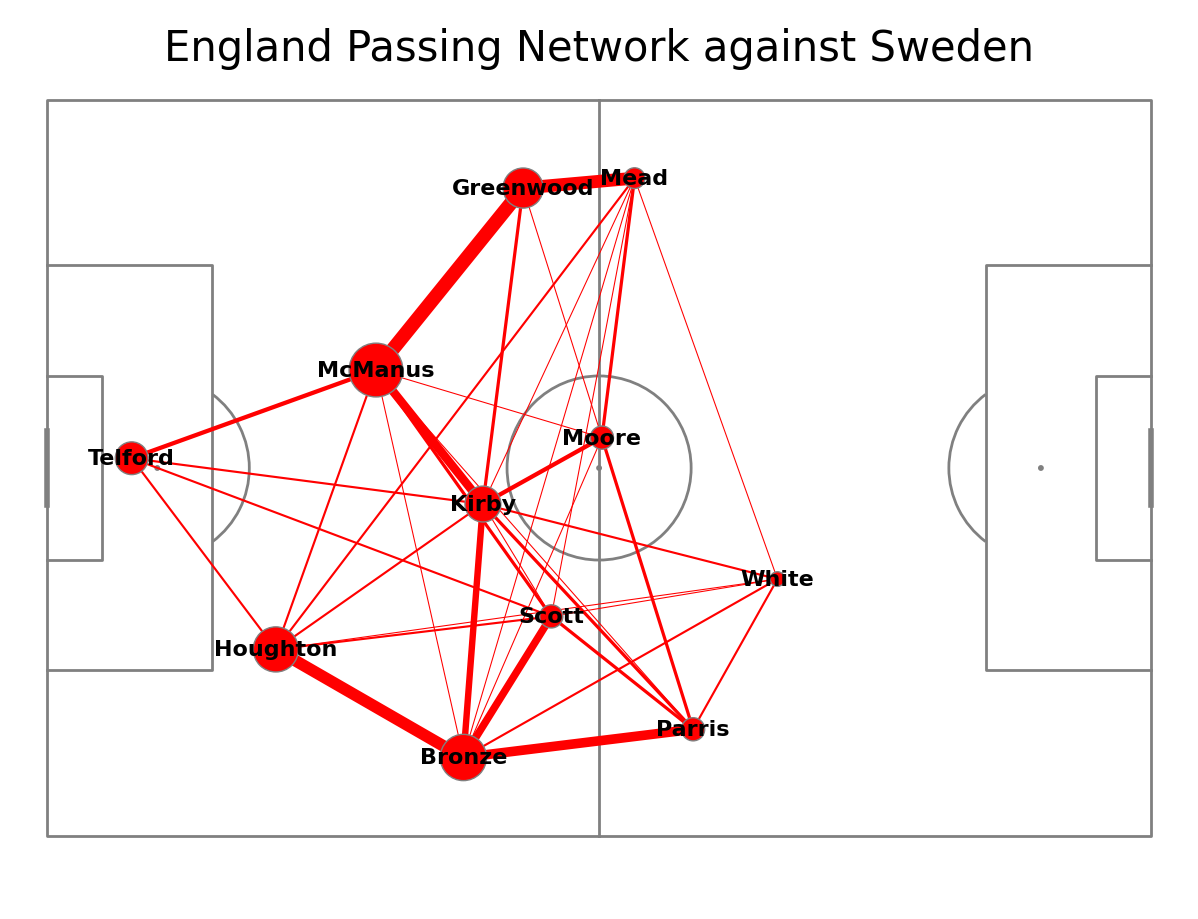

In [52]:
df=parser.event(69301)[0]

#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "England Women's"].iloc[0]["index"]
#make df with successfull passes by England until the first substitution
mask_england = (df.type_name == 'Pass') & (df.team_name == "England Women's") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])
df_pass = df_pass[df_pass['x']<df_pass['end_x']]


scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)


#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
#lines_df = lines_df[lines_df['pass_count']>2]

#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("England Passing Network against Sweden", fontsize = 30)
plt.show()

In [53]:
df_pass[(df_pass['player_name']=='White')|(df_pass['pass_recipient_name']=='White')]

,x,y,end_x,end_y,player_name,pass_recipient_name,pair_key
4,60.0,40.0,61.9,40.9,White,Kirby,Kirby_White
631,28.6,69.7,70.6,64.6,Houghton,White,Houghton_White
692,52.2,51.0,75.5,50.3,Kirby,White,Kirby_White
982,57.6,68.5,73.3,63.9,Scott,White,Scott_White
985,77.5,64.0,83.2,71.3,White,Parris,Parris_White
998,89.5,7.7,107.1,31.9,Mead,White,Mead_White
1349,67.6,59.7,88.8,44.9,Bronze,White,Bronze_White
1396,52.2,65.9,53.9,53.2,Bronze,White,Bronze_White
1574,84.6,58.2,107.7,55.8,Parris,White,Parris_White


In [54]:
lines_df.sort_values('pass_count',ascending=False)

,pair_key,pass_count
9,Greenwood_McManus,13
10,Greenwood_Mead,12
0,Bronze_Houghton,11
5,Bronze_Parris,9
18,Kirby_McManus,8
6,Bronze_Scott,7
1,Bronze_Kirby,6
28,McManus_Telford,4
20,Kirby_Moore,4
27,McManus_Scott,3


# Pass heat maps

In [55]:
!pip install mplsoccer

In [56]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import pandas as pd

## Calculating Leicester City's danger passes in the 2015/16 season

In [57]:
parser = Sbopen()
df_comp = parser.competition()
df_comp[(df_comp['competition_name']=='Premier League')&(df_comp['season_name']=='2015/2016')][['competition_id','season_id']]

,competition_id,season_id
64,2,27


In [58]:
df_games = parser.match(competition_id=2,season_id=27)
team = 'Leicester City'

match_ids = df_games[(df_games['home_team_name']==team)|(df_games['away_team_name']==team)]['match_id'].to_list()

games_played = len(match_ids)

In [59]:
match_ids

[3754058,
 3754045,
 3754049,
 3754146,
 3754006,
 3754023,
 3754085,
 3754106,
 3754174,
 3754186,
 3754166,
 3754211,
 3754237,
 3754263,
 3754335,
 3754302,
 3754013,
 3754343,
 3754156,
 3754203,
 3753987,
 3754065,
 3753982,
 3754002,
 3754033,
 3754152,
 3754165,
 3754181,
 3754227,
 3754228,
 3754229,
 3754231,
 3754250,
 3754261,
 3754275,
 3754289,
 3754290,
 3754341]

In [60]:
#finding the danger passes
danger_passes = pd.DataFrame()
for idx in match_ids:
    df= parser.event(idx)[0]
    for period in [1,2]:
        #filtering for passes only
        mask_pass = (df.team_name==team)&(df.type_name=='Pass')&(df.outcome_name.isnull())&(df.period==period)&(df.sub_type_name.isnull())
        lei_passes = df[mask_pass][['x','y','end_x','end_y','minute','second','player_name']]
        #filtering for shots only
        mask_shot = (df.team_name==team)&(df.type_name=='Shot')&(df.period==period)
        lei_shots = df[mask_shot][['minute','second']]
        #time in secs
        shot_times = lei_shots['minute']*60+lei_shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts i.e if a shot happens early in the half
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert pass times to seconds
        pass_times = lei_passes['minute']*60+lei_passes['second']
        #check if a pass is in any of the windows in a half
        pass_to_shot = pass_times.apply(lambda x:True in ((shot_start < x)&(x< shot_times)).unique())

        #keeping ony danger passes
        danger_passes_period = lei_passes.loc[pass_to_shot]
        #concatenate df with a previous one to keep danger passes from the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period],ignore_index=True)

danger_passes

,x,y,end_x,end_y,minute,second,player_name
0,55.5,8.9,69.8,1.2,9,6,Christian Fuchs
1,69.8,1.4,100.6,9.3,9,8,Marc Albrighton
2,101.7,1.6,89.5,9.6,9,15,N''Golo Kanté
3,86.9,14.5,114.3,51.3,9,17,Marc Albrighton
4,71.5,53.2,108.9,32.4,33,49,Riyad Mahrez
...,...,...,...,...,...,...,...
767,83.0,73.1,82.0,69.7,79,43,José Leonardo Ulloa
768,93.8,46.0,105.1,39.4,79,48,N''Golo Kanté
769,22.6,30.9,86.3,43.9,86,23,Kasper Schmeichel
770,86.3,43.9,98.7,49.7,86,28,José Leonardo Ulloa


## Plotting location of danger passes

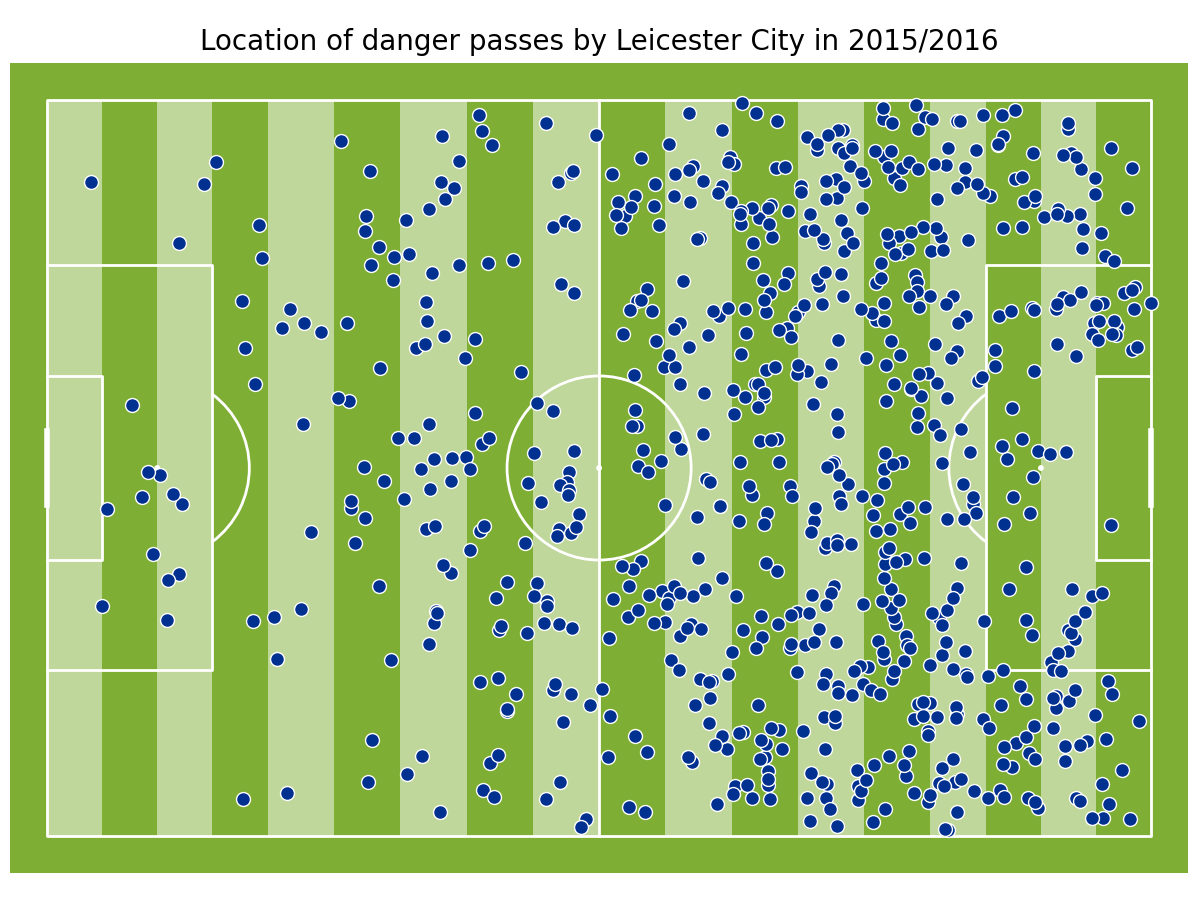

In [61]:
pitch = Pitch(pitch_color='#7eaf34',line_color='white',stripe=True,stripe_color='#bfd79a')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                     endnote_height=0.04,title_space=0,endnote_space=0)
# plot all danger areas
pitch.scatter(danger_passes.x,danger_passes.y,c='#003090',edgecolor="white",s=100,ax=ax['pitch'])
#pitch.arrows(danger_passes.x,danger_passes.y,danger_passes.end_x,danger_passes.end_y,color='#003090',ax=ax['pitch'])
fig.suptitle('Location of danger passes by '+team+' in 2015/2016', fontsize=20)
plt.show()

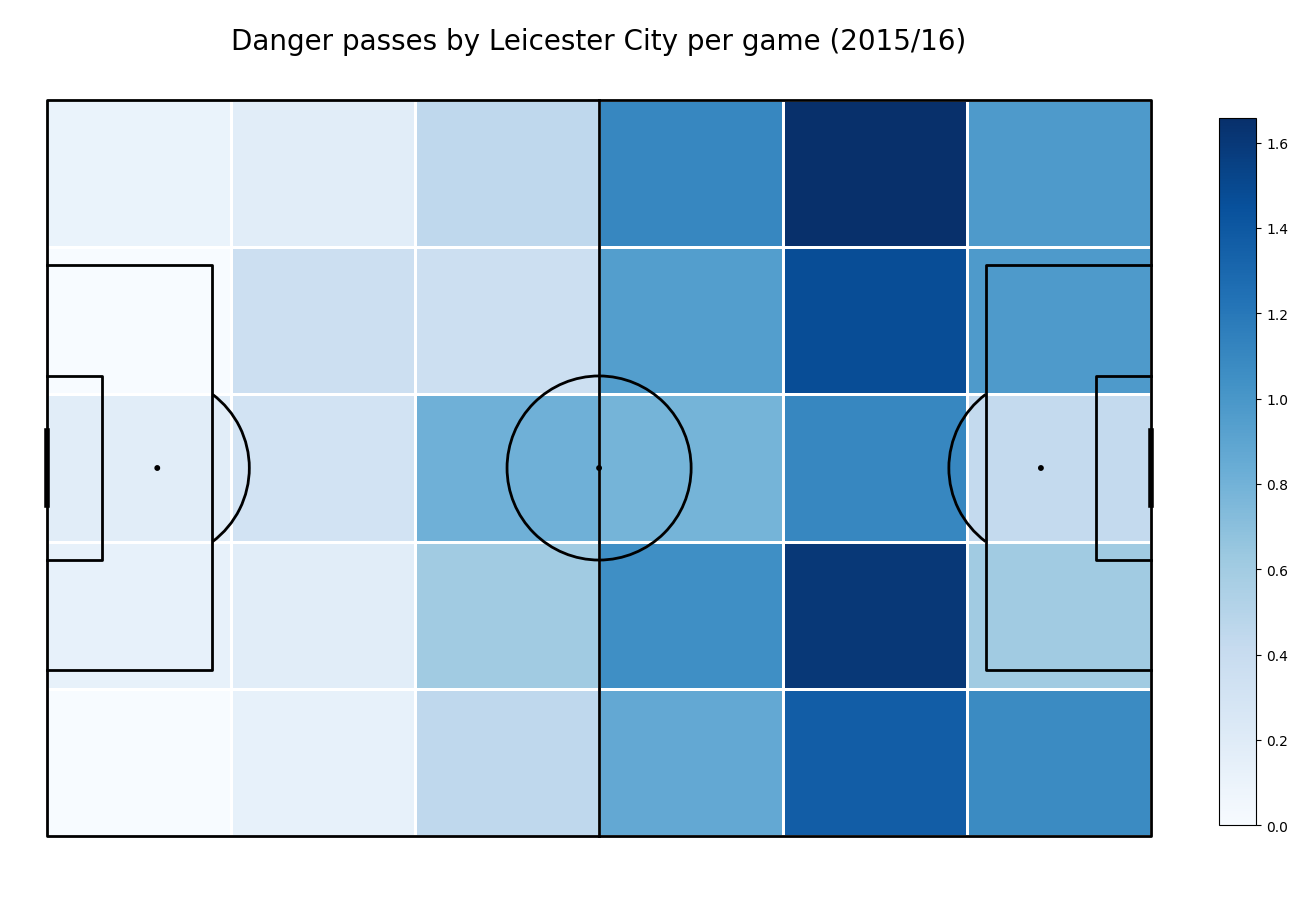

In [62]:
#plotting the heatmap

pitch = Pitch(line_zorder=2,line_color='black')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                    endnote_height=0.04,title_space=0,endnote_space=0)

bin_statistic = pitch.bin_statistic(danger_passes.x,danger_passes.y,statistic='count',bins=(6,5),normalize=False)

bin_statistic['statistic']=bin_statistic['statistic']/games_played

pcm = pitch.heatmap(bin_statistic,cmap='Blues',edgecolors='white',ax=ax['pitch'])
ax_cbar = fig.add_axes((1,0.093,0.03,0.786))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle("Danger passes by "+team+" per game (2015/16)",fontsize=20)
plt.show()

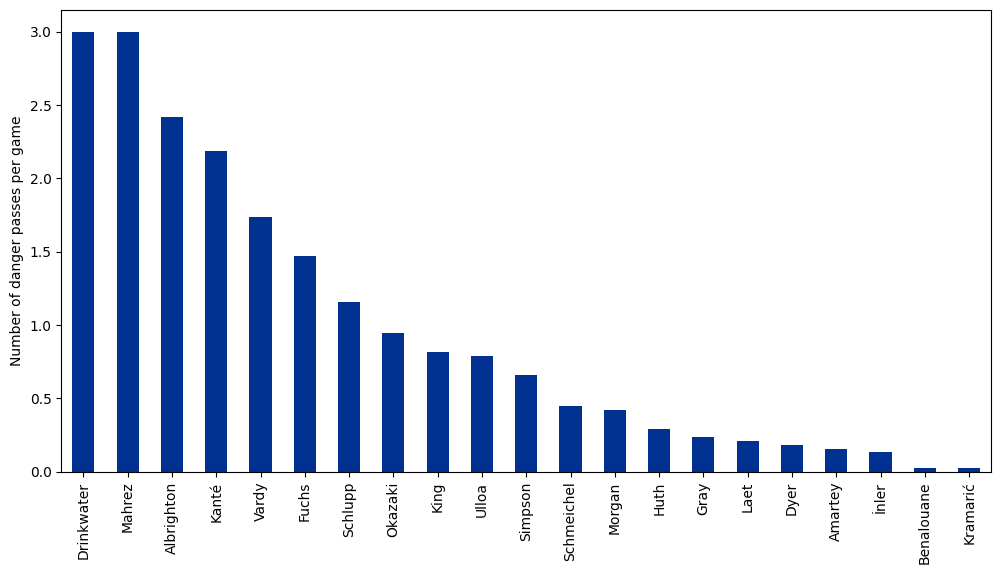

In [63]:
#most involved players
danger_passes['player_name']=danger_passes['player_name'].apply(lambda x: str(x).split()[-1])
pass_count = danger_passes.groupby(['player_name']).x.count()/games_played
pass_count = pass_count.sort_values(ascending=False)

plt.figure(figsize=(12,6))
ax = pass_count.plot.bar(pass_count,color='#003090')
ax.set_xlabel("")
ax.set_ylabel("Number of danger passes per game")
plt.show()

In [64]:
pass_count

player_name
Drinkwater    3.000000
Mahrez        3.000000
Albrighton    2.421053
Kanté         2.184211
Vardy         1.736842
Fuchs         1.473684
Schlupp       1.157895
Okazaki       0.947368
King          0.815789
Ulloa         0.789474
Simpson       0.657895
Schmeichel    0.447368
Morgan        0.421053
Huth          0.289474
Gray          0.236842
Laet          0.210526
Dyer          0.184211
Amartey       0.157895
İnler         0.131579
Benalouane    0.026316
Kramarić      0.026316
Name: x, dtype: float64

## Challenge

1. Improve so that only high xG (>0.07) are included
2. Make a heat map only for Leicester's player who was the most involved in danger passes!

In [65]:
!pip install mplsoccer

In [66]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import pandas as pd

In [67]:
parser = Sbopen()

df_games = parser.match(competition_id=2,season_id=27)
team = 'Leicester City'

match_ids = df_games[(df_games['home_team_name']==team)|(df_games['away_team_name']==team)]['match_id'].to_list()

games_played = len(match_ids)


danger_passes = pd.DataFrame()
for idx in match_ids:
    df= parser.event(idx)[0]
    for period in [1,2]:
        #filtering for passes only
        mask_pass = (df.team_name==team)&(df.type_name=='Pass')&(df.outcome_name.isnull())&(df.period==period)&(df.sub_type_name.isnull())
        lei_passes = df[mask_pass][['x','y','end_x','end_y','minute','second','player_name']]
        #filtering for shots only
        mask_shot = (df.team_name==team)&(df.type_name=='Shot')&(df.period==period)
        lei_shots = df[mask_shot][['minute','second','shot_statsbomb_xg']]
        lei_shots = lei_shots[lei_shots['shot_statsbomb_xg']>0.07]
        #time in secs
        shot_times = lei_shots['minute']*60+lei_shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts i.e if a shot happens early in the half
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert pass times to seconds
        pass_times = lei_passes['minute']*60+lei_passes['second']
        #check if a pass is in any of the windows in a half
        pass_to_shot = pass_times.apply(lambda x:True in ((shot_start < x)&(x< shot_times)).unique())

        #keeping ony danger passes
        danger_passes_period = lei_passes.loc[pass_to_shot]
        #concatenate df with a previous one to keep danger passes from the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period],ignore_index=True)

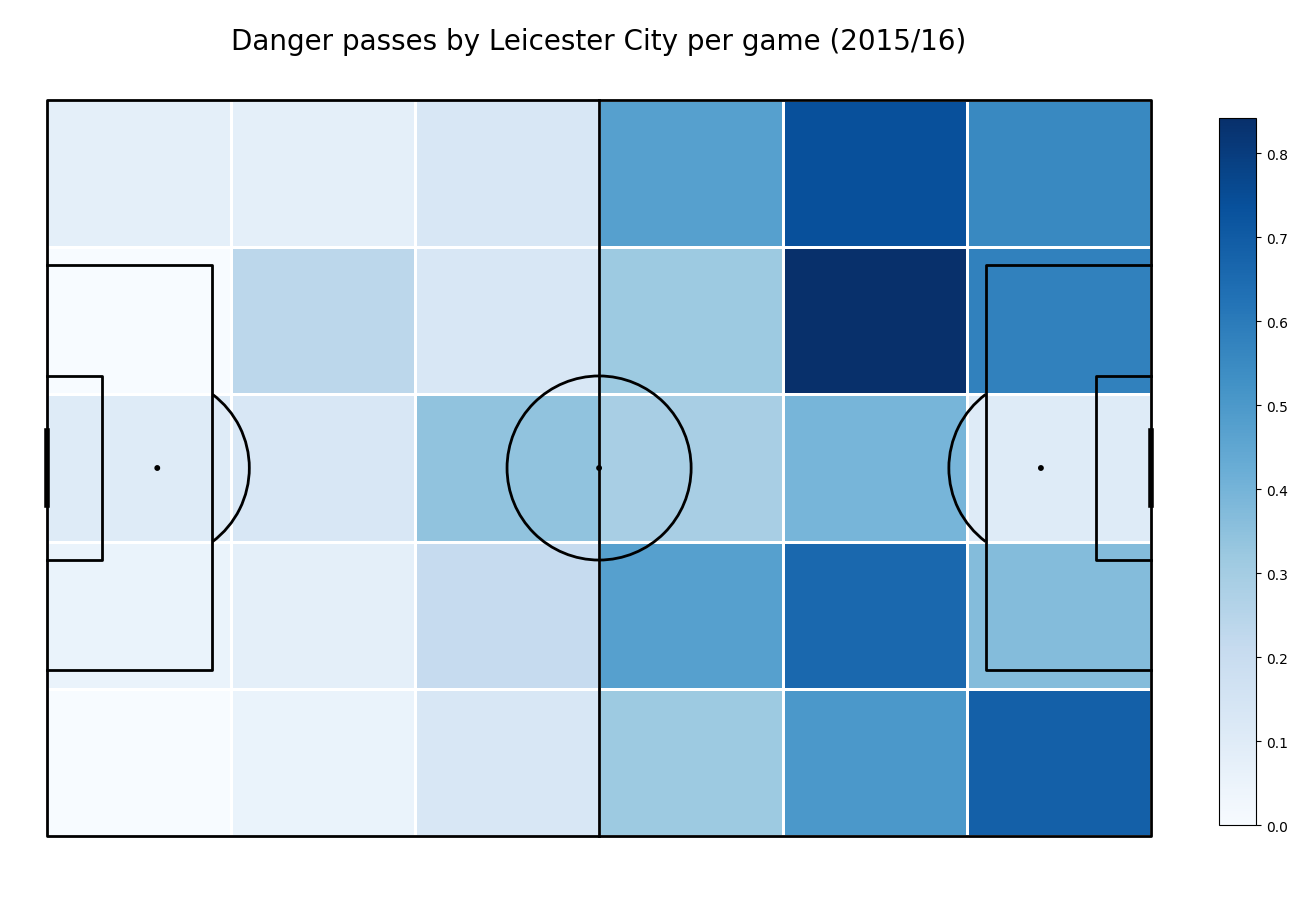

In [68]:
pitch = Pitch(line_zorder=2,line_color='black')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                    endnote_height=0.04,title_space=0,endnote_space=0)

bin_statistic = pitch.bin_statistic(danger_passes.x,danger_passes.y,statistic='count',bins=(6,5),normalize=False)

bin_statistic['statistic']=bin_statistic['statistic']/games_played

pcm = pitch.heatmap(bin_statistic,cmap='Blues',edgecolors='white',ax=ax['pitch'])
ax_cbar = fig.add_axes((1,0.093,0.03,0.786))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle("Danger passes by "+team+" per game (2015/16)",fontsize=20)
plt.show()

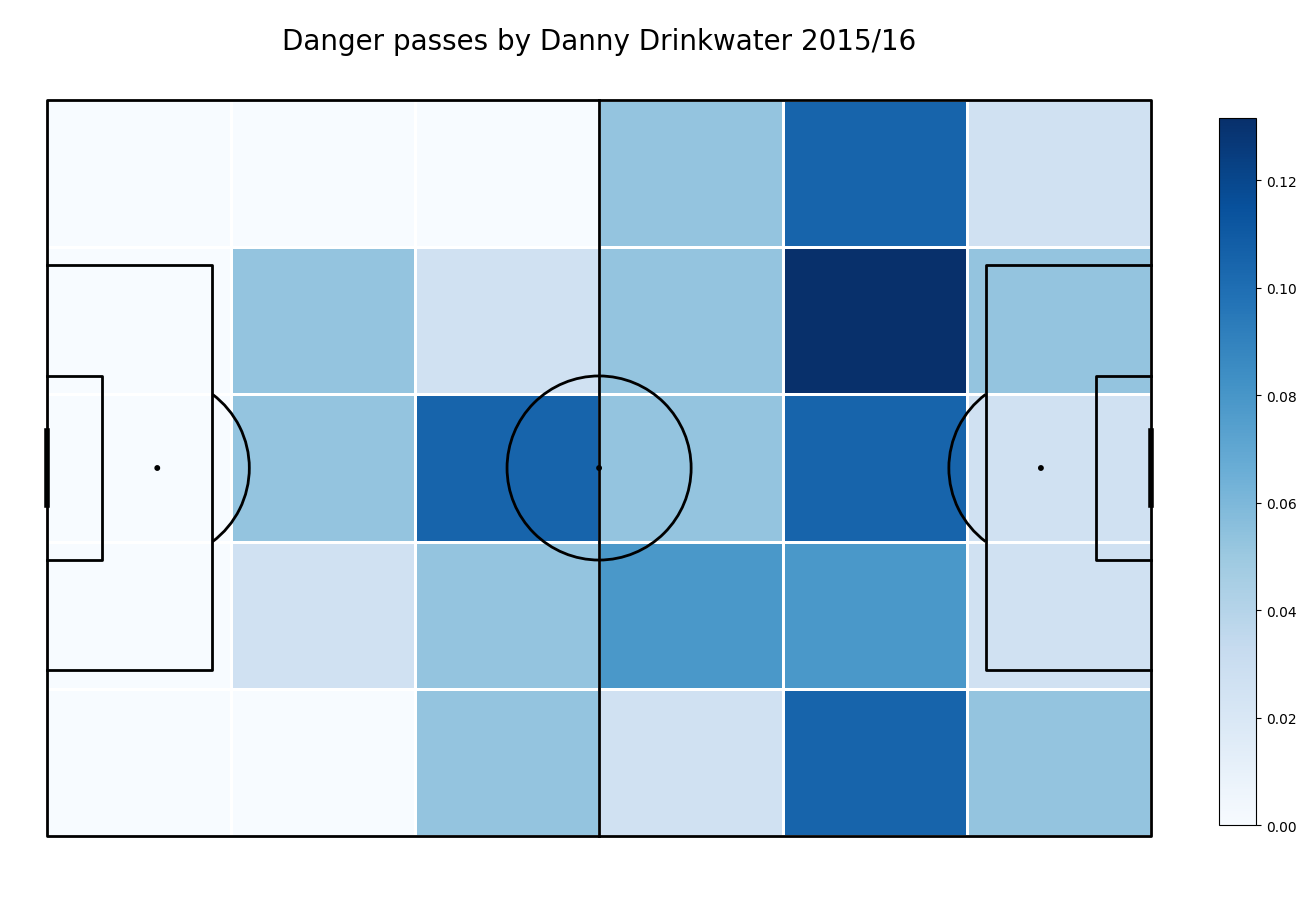

In [69]:
drinkwater_passes = danger_passes[danger_passes['player_name']=='Danny Drinkwater']

pitch = Pitch(line_zorder=2,line_color='black')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                    endnote_height=0.04,title_space=0,endnote_space=0)

bin_statistic = pitch.bin_statistic(drinkwater_passes.x,drinkwater_passes.y,statistic='count',bins=(6,5),normalize=False)

bin_statistic['statistic']=bin_statistic['statistic']/games_played

pcm = pitch.heatmap(bin_statistic,cmap='Blues',edgecolors='white',ax=ax['pitch'])
ax_cbar = fig.add_axes((1,0.093,0.03,0.786))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle("Danger passes by Danny Drinkwater 2015/16",fontsize=20)
plt.show()

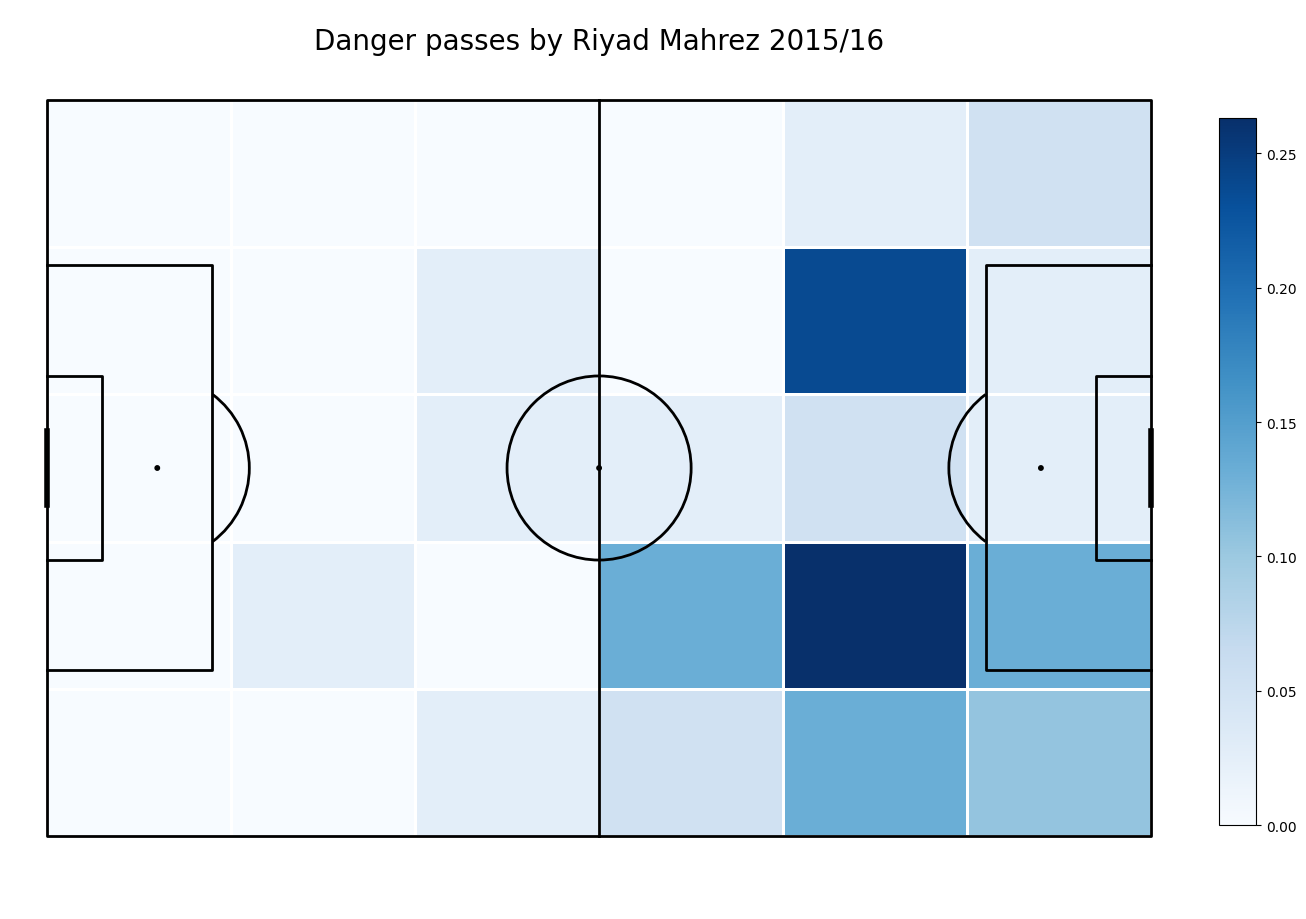

In [70]:
mahrez_passes = danger_passes[danger_passes['player_name']=='Riyad Mahrez']

pitch = Pitch(line_zorder=2,line_color='black')
fig, ax = pitch.grid(grid_height=0.9,title_height=0.06,axis=False,
                    endnote_height=0.04,title_space=0,endnote_space=0)

bin_statistic = pitch.bin_statistic(mahrez_passes.x,mahrez_passes.y,statistic='count',bins=(6,5),normalize=False)

bin_statistic['statistic']=bin_statistic['statistic']/games_played

pcm = pitch.heatmap(bin_statistic,cmap='Blues',edgecolors='white',ax=ax['pitch'])
ax_cbar = fig.add_axes((1,0.093,0.03,0.786))
cbar = plt.colorbar(pcm,cax=ax_cbar)
fig.suptitle("Danger passes by Riyad Mahrez 2015/16",fontsize=20)
plt.show()

In [73]:
df_competition[df_competition['competition_name']=='Champions League']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
5,16,2,Europe,Champions League,male,False,False,2016/2017,2024-02-13T02:37:32.205154,2021-06-13T16:17:31.694,None,2024-02-13T02:37:32.205154
6,16,27,Europe,Champions League,male,False,False,2015/2016,2024-06-12T07:45:38.786894,2021-06-13T16:17:31.694,None,2024-06-12T07:45:38.786894
7,16,26,Europe,Champions League,male,False,False,2014/2015,2024-02-12T12:49:54.914228,2021-06-13T16:17:31.694,None,2024-02-12T12:49:54.914228
8,16,25,Europe,Champions League,male,False,False,2013/2014,2024-02-12T12:48:48.479157,2021-06-13T16:17:31.694,None,2024-02-12T12:48:48.479157
9,16,24,Europe,Champions League,male,False,False,2012/2013,2024-02-12T12:47:34.340413,2021-06-13T16:17:31.694,None,2024-02-12T12:47:34.340413
10,16,23,Europe,Champions League,male,False,False,2011/2012,2024-02-13T02:36:35.698340,2021-06-13T16:17:31.694,None,2024-02-13T02:36:35.698340
11,16,22,Europe,Champions League,male,False,False,2010/2011,2024-02-12T12:53:03.944320,2021-06-13T16:17:31.694,None,2024-02-12T12:53:03.944320
12,16,21,Europe,Champions League,male,False,False,2009/2010,2024-02-12T12:49:25.017694,2021-06-13T16:17:31.694,None,2024-02-12T12:49:25.017694
